<a href="https://colab.research.google.com/github/alireza-data/Sport-Activities/blob/main/Activity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127939 (\N{RUNNER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


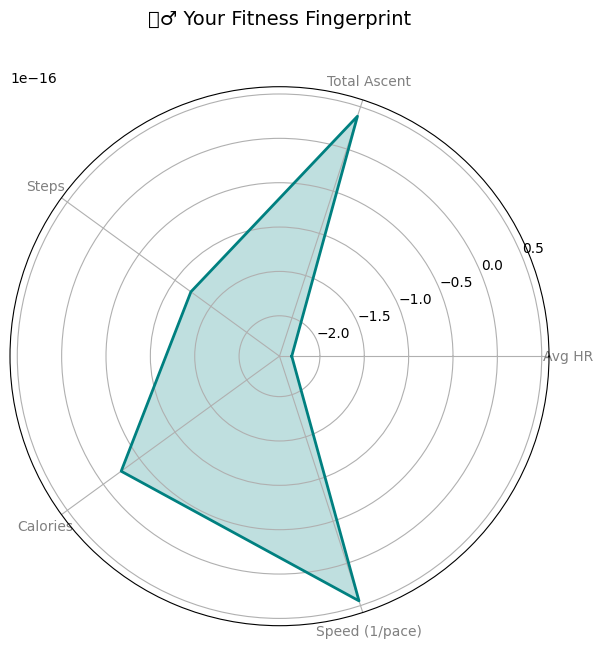


📊 RADAR CHART — YOUR FITNESS FINGERPRINT
Each axis represents one normalized training metric:
- Avg HR: cardiovascular intensity
- Total Ascent: elevation challenge
- Steps: total activity volume
- Calories: overall energy output
- Speed (1/pace): movement efficiency (higher = faster)

The filled shape shows your *training personality* —
whether you favor endurance, speed, elevation, or balance.



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128034 (\N{TURTLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


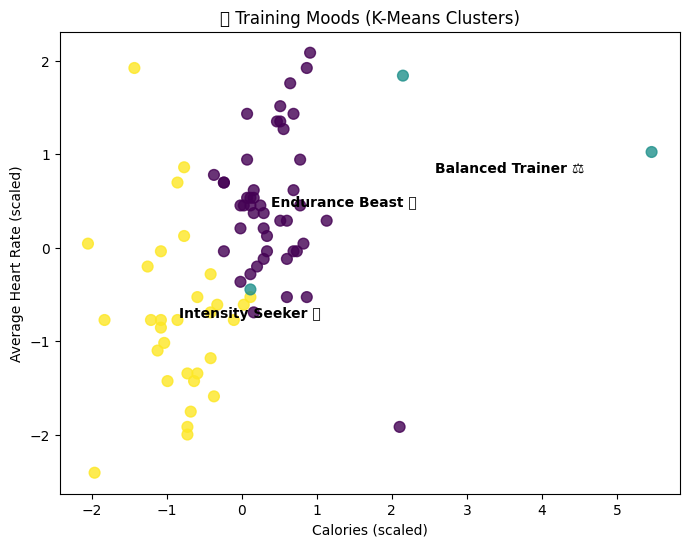


🧭 SCATTER PLOT — TRAINING MOODS
Each dot = one activity.
Color = your training mood (K-Means cluster):

🐢 Endurance Beast — long and steady sessions
⚖️ Balanced Trainer — moderate pace and controlled HR
🔥 Intensity Seeker — short, hard, high-HR workouts

This helps you visualize your distribution of workouts and intensity over time.



In [ ]:
# ======================================
# 🏃‍♂️ FITNESS FINGERPRINT & TRAINING MOOD ANALYSIS
# ======================================

# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import pi

# 📂 Load dataset from Google Drive
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# 🧹 Select and clean relevant columns
cols = ['Avg HR', 'Avg Pace', 'Total Ascent', 'Steps', 'Calories']
df = df[cols].copy()
df = df.replace(['--', 'NaN', '', ' '], np.nan)

# 🕒 Convert Avg Pace (mm:ss) → seconds per km
def pace_to_seconds(pace_str):
    try:
        parts = str(pace_str).split(':')
        if len(parts) == 2:
            return int(parts[0]) * 60 + float(parts[1])
        else:
            return float(pace_str)
    except:
        return np.nan

df['Avg Pace (s/km)'] = df['Avg Pace'].apply(pace_to_seconds)
df = df.drop(columns=['Avg Pace'])

# 🔢 Convert all columns to numeric
for col in ['Avg HR', 'Total Ascent', 'Steps', 'Calories', 'Avg Pace (s/km)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 🚫 Drop rows with NaN or Inf
df = df.dropna()
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# 🏃‍♀️ Convert pace to speed (higher = faster)
df['Speed (1/pace)'] = 1 / df['Avg Pace (s/km)']
df = df.drop(columns=['Avg Pace (s/km)'])

# 🌈 Normalize metrics
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

# ==============================
# 🔍 K-MEANS CLUSTERING
# ==============================
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['Mood Cluster'] = kmeans.fit_predict(df_scaled)

# Assign mood labels
mood_labels = {
    0: "Endurance Beast 🐢",
    1: "Balanced Trainer ⚖️",
    2: "Intensity Seeker 🔥"
}
df_scaled['Mood Label'] = df_scaled['Mood Cluster'].map(mood_labels)

# ==============================
# 🎯 RADAR CHART — Fitness Fingerprint
# ==============================
mean_values = df_scaled.drop(columns=['Mood Cluster', 'Mood Label']).mean().values
categories = list(df_scaled.drop(columns=['Mood Cluster', 'Mood Label']).columns)

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
values = np.concatenate((mean_values, [mean_values[0]]))

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.plot(angles, values, linewidth=2, linestyle='solid', color='teal')
ax.fill(angles, values, 'teal', alpha=0.25)
plt.title("🏃‍♂️ Your Fitness Fingerprint", size=14, y=1.1)
plt.show()

print("""
📊 RADAR CHART — YOUR FITNESS FINGERPRINT
Each axis represents one normalized training metric:
- Avg HR: cardiovascular intensity
- Total Ascent: elevation challenge
- Steps: total activity volume
- Calories: overall energy output
- Speed (1/pace): movement efficiency (higher = faster)

The filled shape shows your *training personality* —
whether you favor endurance, speed, elevation, or balance.
""")

# ==============================
# 🧭 SCATTER PLOT — Training Moods
# ==============================
plt.figure(figsize=(8,6))
plt.scatter(df_scaled['Calories'], df_scaled['Avg HR'],
            c=df_scaled['Mood Cluster'], cmap='viridis', s=60, alpha=0.8)
plt.title("🧭 Training Moods (K-Means Clusters)")
plt.xlabel("Calories (scaled)")
plt.ylabel("Average Heart Rate (scaled)")  # ✅ Fixed unterminated string

# Label cluster centers with mood names
for mood in df_scaled['Mood Label'].unique():
    subset = df_scaled[df_scaled['Mood Label'] == mood]
    plt.text(subset['Calories'].mean(),
             subset['Avg HR'].mean(),
             mood, fontsize=10, fontweight='bold', color='black')

plt.show()

print("""
🧭 SCATTER PLOT — TRAINING MOODS
Each dot = one activity.
Color = your training mood (K-Means cluster):

🐢 Endurance Beast — long and steady sessions
⚖️ Balanced Trainer — moderate pace and controlled HR
🔥 Intensity Seeker — short, hard, high-HR workouts

This helps you visualize your distribution of workouts and intensity over time.
""")


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127851 (\N{CHOCOLATE BAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


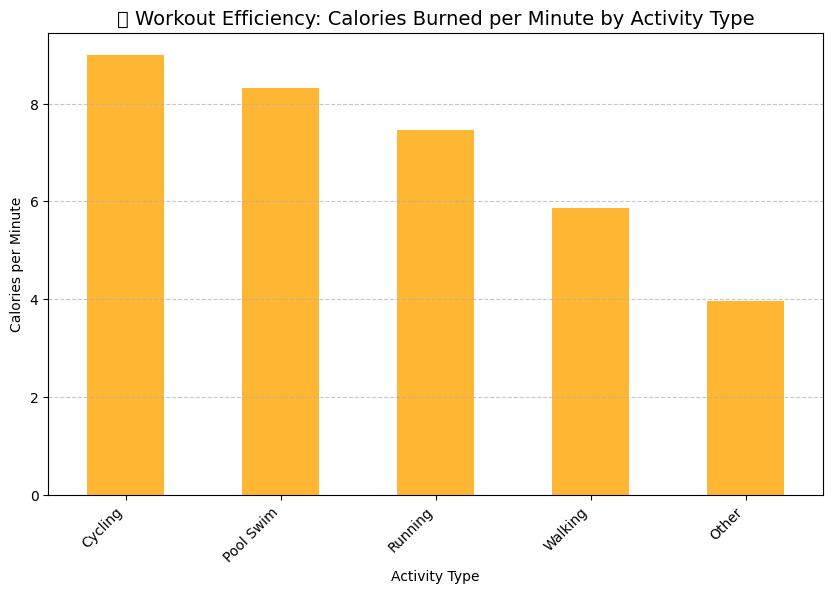


🍫 BAR CHART — EFFORT VS REWARD
Each bar shows the *average calories burned per minute* for each activity type.

- Taller bars = more efficient workouts (higher calories burned per minute)
- Compare your activities: e.g., running vs cycling vs swimming
- Insight: find which activities give you the *most "reward"* for your effort/time invested.



In [ ]:
# ======================================
# 🍫 EFFORT VS REWARD — Calories Burned per Minute
# ======================================

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Keep relevant columns
cols = ['Activity Type', 'Calories', 'Time']
df = df[cols].copy()

# Replace invalid entries
df = df.replace(['--', 'NaN', '', ' '], pd.NA)

# ----- Convert Calories to numeric -----
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

# ----- Convert Time to minutes -----
# Handle hh:mm:ss or mm:ss or seconds
def time_to_minutes(t):
    try:
        t = str(t)
        if ':' in t:
            parts = [float(x) for x in t.split(':')]
            if len(parts) == 3:  # hh:mm:ss
                return parts[0]*60 + parts[1] + parts[2]/60
            elif len(parts) == 2:  # mm:ss
                return parts[0] + parts[1]/60
            else:
                return float(parts[0])/60
        else:
            return float(t)/60  # assume seconds
    except:
        return pd.NA

df['Time (min)'] = df['Time'].apply(time_to_minutes)

# Drop rows with missing or zero time/calories
df = df.dropna(subset=['Calories', 'Time (min)'])
df = df[df['Time (min)'] > 0]

# ----- Calculate Calories per Minute -----
df['Calories per Minute'] = df['Calories'] / df['Time (min)']

# ----- Aggregate by Activity Type -----
efficiency = df.groupby('Activity Type')['Calories per Minute'].mean().sort_values(ascending=False)

# ==============================
# 🍫 Bar Chart Visualization
# ==============================
if len(efficiency) > 0:
    plt.figure(figsize=(10,6))
    efficiency.plot(kind='bar', color='orange', alpha=0.8)
    plt.title("🍫 Workout Efficiency: Calories Burned per Minute by Activity Type", fontsize=14)
    plt.ylabel("Calories per Minute")
    plt.xlabel("Activity Type")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print("""
🍫 BAR CHART — EFFORT VS REWARD
Each bar shows the *average calories burned per minute* for each activity type.

- Taller bars = more efficient workouts (higher calories burned per minute)
- Compare your activities: e.g., running vs cycling vs swimming
- Insight: find which activities give you the *most "reward"* for your effort/time invested.
""")
else:
    print("No valid data available to plot. Please check 'Calories' and 'Time' columns.")


🏅 HERO WORKOUTS — Personal Records


,Metric,Value,Date
0,Fastest Pace,0:04 min/km,2022-05-31
1,Max HR,187.0,2020-05-28
2,Longest Distance,20.97 km,2021-05-30
3,Highest Climb,956.0 m,2021-12-23


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


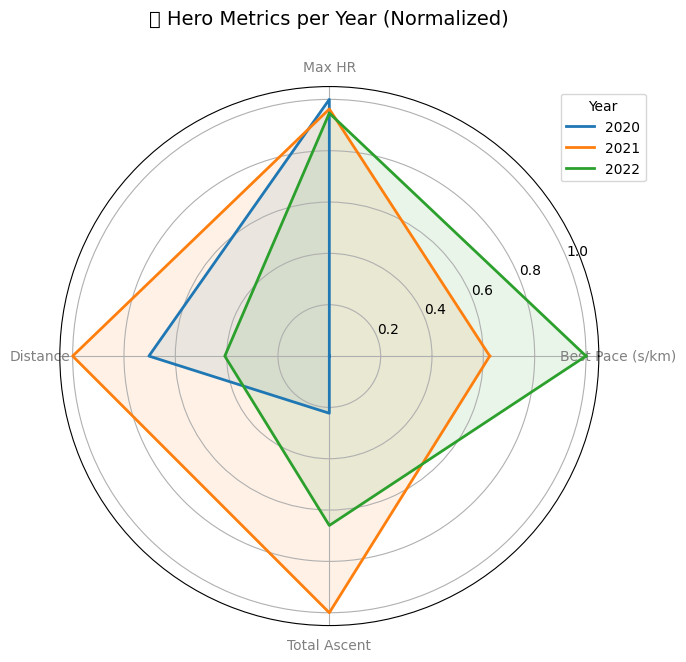


🏆 RADAR CHART — HERO METRICS PER YEAR
Each axis shows one metric (normalized):
- Best Pace: inverted so higher = faster
- Max HR
- Distance
- Total Ascent

Each colored line represents a year. You can see in which years you performed your best in different areas.



In [ ]:
# ======================================
# 🏅 HERO WORKOUTS — Personal Records
# ======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Select relevant columns
cols = ['Date', 'Best Pace', 'Max HR', 'Total Ascent', 'Distance']
df = df[cols].copy()

# Replace invalid entries
df = df.replace(['--', 'NaN', '', ' '], pd.NA)

# Convert numeric columns
df['Max HR'] = pd.to_numeric(df['Max HR'], errors='coerce')
df['Total Ascent'] = pd.to_numeric(df['Total Ascent'], errors='coerce')
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

# Parse Best Pace (mm:ss) → seconds per km
def pace_to_seconds(pace_str):
    try:
        parts = str(pace_str).split(':')
        if len(parts) == 2:
            return int(parts[0])*60 + float(parts[1])
        elif len(parts) == 3:  # hh:mm:ss
            return int(parts[0])*3600 + int(parts[1])*60 + float(parts[2])
        else:
            return float(parts[0])
    except:
        return np.nan

df['Best Pace (s/km)'] = df['Best Pace'].apply(pace_to_seconds)

# Drop rows with missing data
df = df.dropna(subset=['Best Pace (s/km)', 'Max HR', 'Total Ascent', 'Distance', 'Date'])

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# ----- Find Hero Workouts -----
hero_fastest = df.loc[df['Best Pace (s/km)'].idxmin()]
hero_high_hr = df.loc[df['Max HR'].idxmax()]
hero_longest_distance = df.loc[df['Distance'].idxmax()]
hero_highest_ascent = df.loc[df['Total Ascent'].idxmax()]

# Create a summary table
hero_table = pd.DataFrame({
    'Metric': ['Fastest Pace', 'Max HR', 'Longest Distance', 'Highest Climb'],
    'Value': [
        f"{int(hero_fastest['Best Pace (s/km)']//60)}:{int(hero_fastest['Best Pace (s/km)']%60):02d} min/km",
        hero_high_hr['Max HR'],
        f"{hero_longest_distance['Distance']} km",
        f"{hero_highest_ascent['Total Ascent']} m"
    ],
    'Date': [
        hero_fastest['Date'].date(),
        hero_high_hr['Date'].date(),
        hero_longest_distance['Date'].date(),
        hero_highest_ascent['Date'].date()
    ]
})

print("🏅 HERO WORKOUTS — Personal Records")
display(hero_table)

# ==============================
# 🏆 RADAR CHART — Best Metrics per Year
# ==============================
# Add Year column
df['Year'] = df['Date'].dt.year

# Compute yearly max or min for each metric
yearly_best = df.groupby('Year').agg({
    'Best Pace (s/km)': 'min',   # lower = better
    'Max HR': 'max',
    'Distance': 'max',
    'Total Ascent': 'max'
}).reset_index()

# Normalize for radar chart (0-1 scale)
metrics = ['Best Pace (s/km)', 'Max HR', 'Distance', 'Total Ascent']
yearly_norm = yearly_best.copy()
yearly_norm['Best Pace (s/km)'] = yearly_best['Best Pace (s/km)'].max() - yearly_best['Best Pace (s/km)']  # invert pace
yearly_norm[metrics] = yearly_norm[metrics] / yearly_norm[metrics].max()

# Radar chart setup
categories = metrics
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

for i, row in yearly_norm.iterrows():
    values = row[categories].values
    values = np.concatenate((values, [values[0]]))  # close the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=int(row['Year']))
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories, color='grey', size=10)
plt.title("🏆 Hero Metrics per Year (Normalized)", size=14, y=1.1)
plt.legend(title="Year", bbox_to_anchor=(1.1, 1))
plt.show()

print("""
🏆 RADAR CHART — HERO METRICS PER YEAR
Each axis shows one metric (normalized):
- Best Pace: inverted so higher = faster
- Max HR
- Distance
- Total Ascent

Each colored line represents a year. You can see in which years you performed your best in different areas.
""")


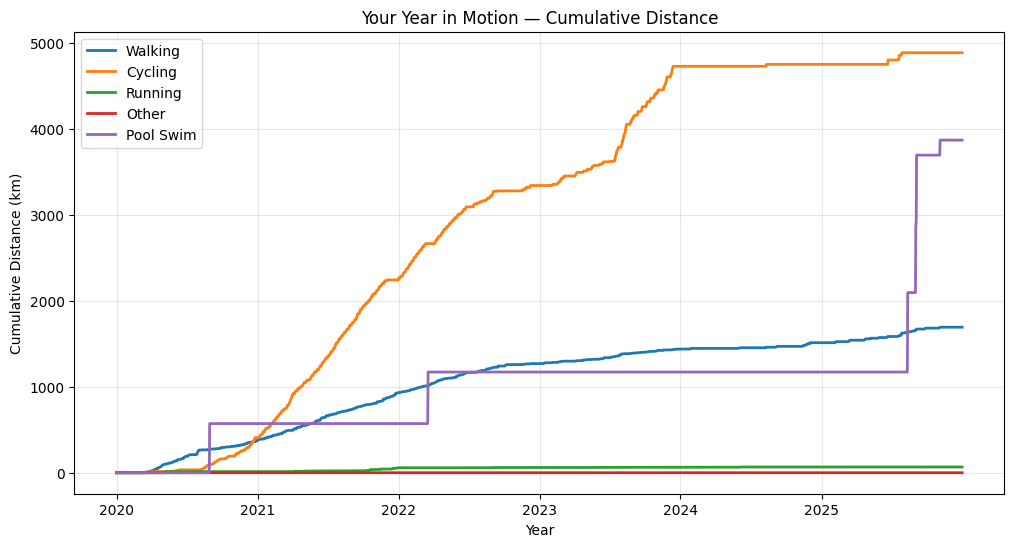

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Select relevant columns
cols = ['Date', 'Distance', 'Activity Type']
df = df[cols].copy()
df = df.replace(['--', 'NaN', '', ' '], pd.NA).dropna(subset=['Date', 'Distance', 'Activity Type'])

# Convert numeric and datetime
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Distance', 'Date'])
df = df.sort_values('Date')

# Activity types
activity_types = df['Activity Type'].unique()

# Create a full date range covering 2020–2025
date_range = pd.date_range(start='2020-01-01', end='2025-12-31')

# Compute cumulative distance per activity type
cumulative_df = pd.DataFrame(index=date_range)
for act in activity_types:
    act_cumsum = df[df['Activity Type'] == act].groupby('Date')['Distance'].sum().cumsum()
    cumulative_df[act] = act_cumsum.reindex(date_range, method='ffill').fillna(0)

# Plot static graph
plt.figure(figsize=(12,6))
for act in activity_types:
    plt.plot(date_range, cumulative_df[act], label=act, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Cumulative Distance (km)')
plt.title('Your Year in Motion — Cumulative Distance')
plt.legend()
plt.grid(alpha=0.3)

# Set X-axis ticks explicitly for years 2020–2025
years = pd.date_range(start='2020-01-01', end='2025-01-01', freq='YS')
plt.xticks(years, [str(y.year) for y in years])

plt.show()


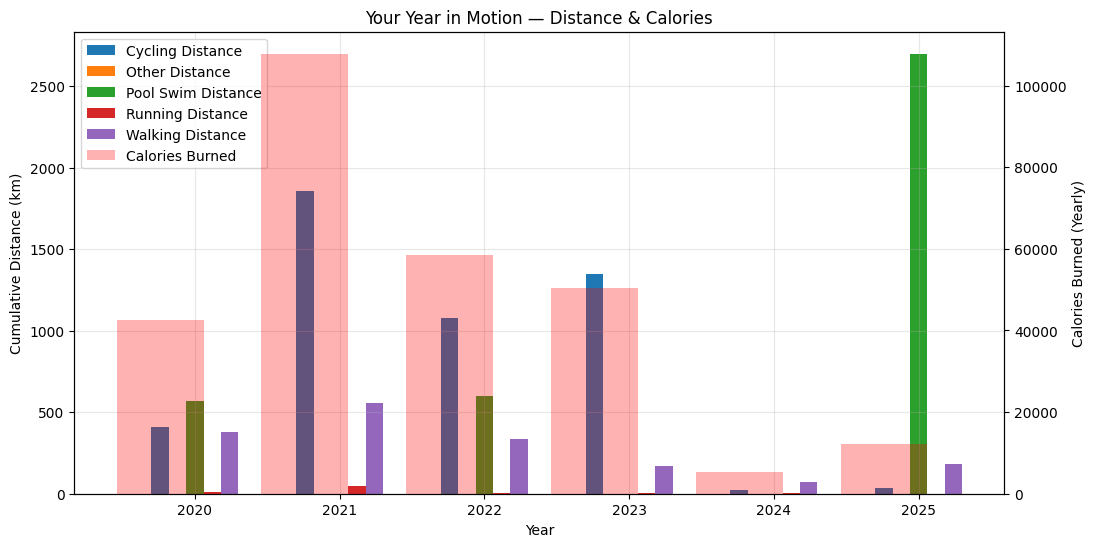

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Select relevant columns
cols = ['Date', 'Distance', 'Calories', 'Activity Type']
df = df[cols].copy()
df = df.replace(['--', 'NaN', '', ' '], pd.NA).dropna(subset=['Date', 'Distance', 'Calories', 'Activity Type'])

# Convert numeric and datetime
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Distance', 'Calories', 'Date'])
df = df.sort_values('Date')

# Add year column
df['Year'] = df['Date'].dt.year
years = [2020, 2021, 2022, 2023, 2024, 2025]  # ensure all years are included

# Compute cumulative distance per activity type per year
distance_yearly = df.groupby(['Year', 'Activity Type'])['Distance'].sum().unstack(fill_value=0)
distance_yearly = distance_yearly.reindex(years, fill_value=0)

# Compute total calories per year
calories_yearly = df.groupby('Year')['Calories'].sum().reindex(years, fill_value=0)

# Plot setup
fig, ax1 = plt.subplots(figsize=(12,6))

# Set bar width and positions
bar_width = 0.12
x = np.arange(len(years))

# Plot cumulative distance bars (grouped by activity type)
for i, act in enumerate(distance_yearly.columns):
    ax1.bar(x + i*bar_width, distance_yearly[act], width=bar_width, label=f"{act} Distance")

ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative Distance (km)')
ax1.set_title('Your Year in Motion — Distance & Calories')
ax1.set_xticks(x + bar_width*(len(distance_yearly.columns)-1)/2)
ax1.set_xticklabels(years)
ax1.grid(alpha=0.3)

# Secondary axis for yearly calories (single bar per year, semi-transparent)
ax2 = ax1.twinx()
ax2.bar(x, calories_yearly.values, width=bar_width*len(distance_yearly.columns),
        color='red', alpha=0.3, label='Calories Burned')
ax2.set_ylabel('Calories Burned (Yearly)')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


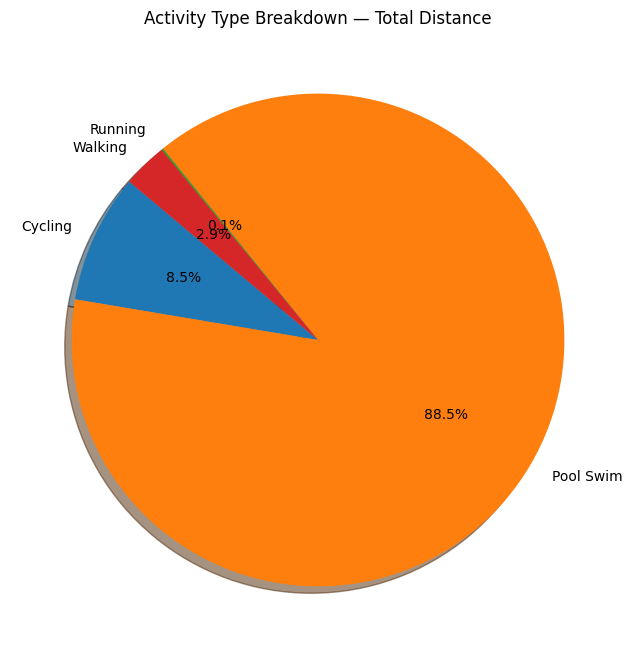

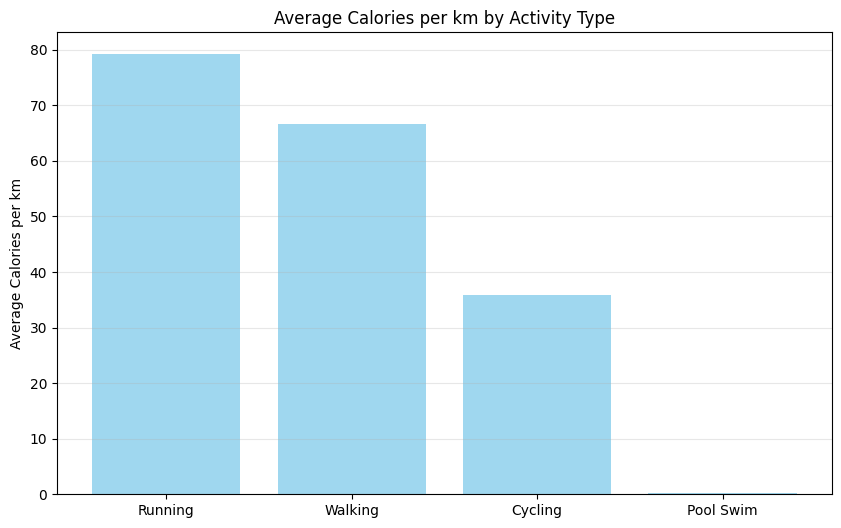

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Select relevant columns
cols = ['Activity Type', 'Distance', 'Time', 'Calories']
df = df[cols].copy()

# ------------------------------
# Convert Distance: remove units and convert to float
df['Distance'] = df['Distance'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

# Convert Time: from "HH:MM:SS" or "MM:SS" to total minutes
def time_to_minutes(t):
    try:
        parts = [float(p) for p in t.split(':')]
        if len(parts) == 3:
            return parts[0]*60 + parts[1] + parts[2]/60
        elif len(parts) == 2:
            return parts[0] + parts[1]/60
        else:
            return float(parts[0])
    except:
        return np.nan

df['Time'] = df['Time'].astype(str).apply(time_to_minutes)

# Convert Calories: remove non-numeric characters
df['Calories'] = df['Calories'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

# Drop invalid or zero rows
df = df.dropna(subset=['Activity Type', 'Distance', 'Time', 'Calories'])
df = df[df['Distance'] > 0]

if df.empty:
    raise ValueError("No valid numeric data found in your CSV. Please check Distance, Time, Calories columns.")

# ------------------------------
# Pie chart: Percentage of total distance per activity type
distance_by_activity = df.groupby('Activity Type')['Distance'].sum()
plt.figure(figsize=(8,8))
plt.pie(distance_by_activity, labels=distance_by_activity.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Activity Type Breakdown — Total Distance')
plt.show()

# ------------------------------
# Bar chart: Average calories per km per activity type
df['Calories_per_km'] = df['Calories'] / df['Distance']
avg_calories_per_km = df.groupby('Activity Type')['Calories_per_km'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(avg_calories_per_km.index, avg_calories_per_km.values, color='skyblue', alpha=0.8)
plt.ylabel('Average Calories per km')
plt.title('Average Calories per km by Activity Type')
plt.grid(axis='y', alpha=0.3)
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


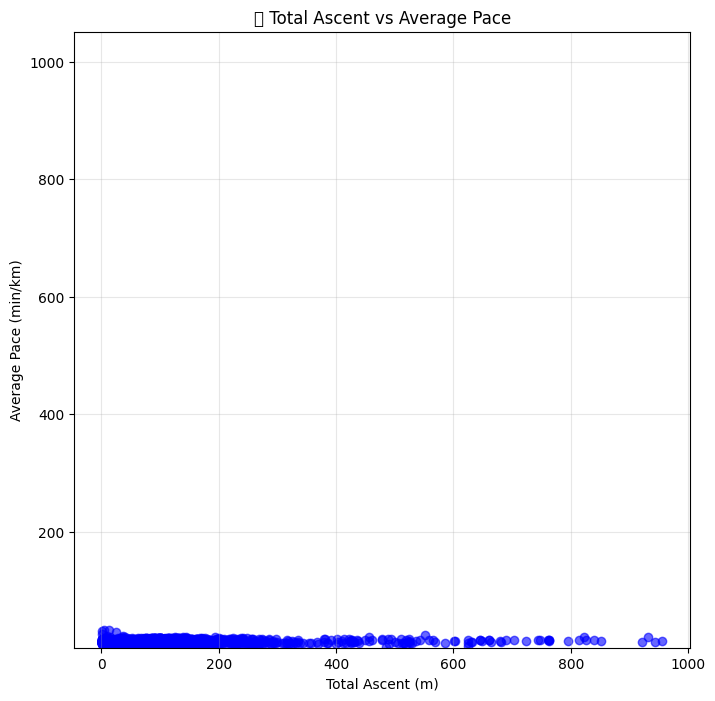

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9968 (\N{MOUNTAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


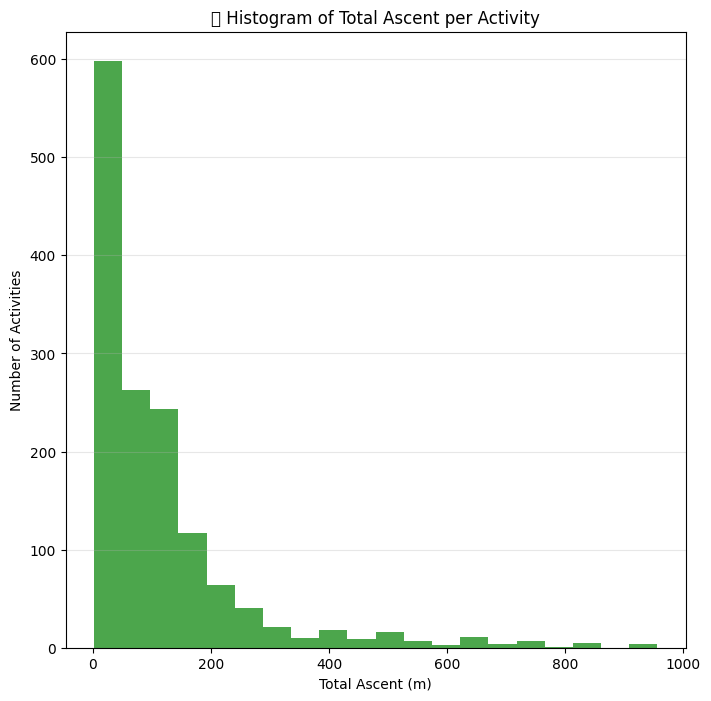

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Select relevant columns
cols = ['Total Ascent', 'Avg Pace', 'Max Elevation', 'Activity Type', 'Distance']
df = df[cols].copy()

# ------------------------------
# Clean numeric data
df = df.replace(['--', 'NaN', '', ' '], pd.NA)

# Convert Avg Pace from "MM:SS" or "HH:MM:SS" to minutes
def pace_to_min(pace_str):
    try:
        parts = [float(p) for p in str(pace_str).split(':')]
        if len(parts) == 3:  # HH:MM:SS
            return parts[0]*60 + parts[1] + parts[2]/60
        elif len(parts) == 2:  # MM:SS
            return parts[0] + parts[1]/60
        else:  # assume numeric minutes
            return parts[0]
    except:
        return np.nan

df['Avg Pace'] = df['Avg Pace'].apply(pace_to_min)

# Convert other numeric columns
for col in ['Total Ascent', 'Max Elevation']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=['Total Ascent', 'Avg Pace', 'Max Elevation'])

if df.empty:
    raise ValueError("No valid numeric data for Total Ascent, Avg Pace, or Max Elevation.")

# ------------------------------
# Scatter plot: Total Ascent vs Avg Pace
plt.figure(figsize=(8,8))
plt.scatter(df['Total Ascent'], df['Avg Pace'], c='blue', alpha=0.6)
plt.xlabel('Total Ascent (m)')
plt.ylabel('Average Pace (min/km)')
plt.title('🏔️ Total Ascent vs Average Pace')
plt.grid(alpha=0.3)
plt.axis('square')  # Make graph square
plt.show()

# ------------------------------
# Histogram: Distribution of elevation gains (Total Ascent)
plt.figure(figsize=(8,8))
plt.hist(df['Total Ascent'], bins=20, color='green', alpha=0.7)
plt.xlabel('Total Ascent (m)')
plt.ylabel('Number of Activities')
plt.title('⛰️ Histogram of Total Ascent per Activity')
plt.grid(axis='y', alpha=0.3)
plt.show()


Columns in CSV: ['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories', 'Time', 'Avg HR', 'Max HR', 'Avg Swim Cadence', 'Max Swim Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent', 'Avg Stride Length', 'Training Stress Score®', 'Total Strokes', 'Avg. Swolf', 'Avg Stroke Rate', 'Steps', 'Decompression', 'Best Lap Time', 'Number of Laps', 'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']


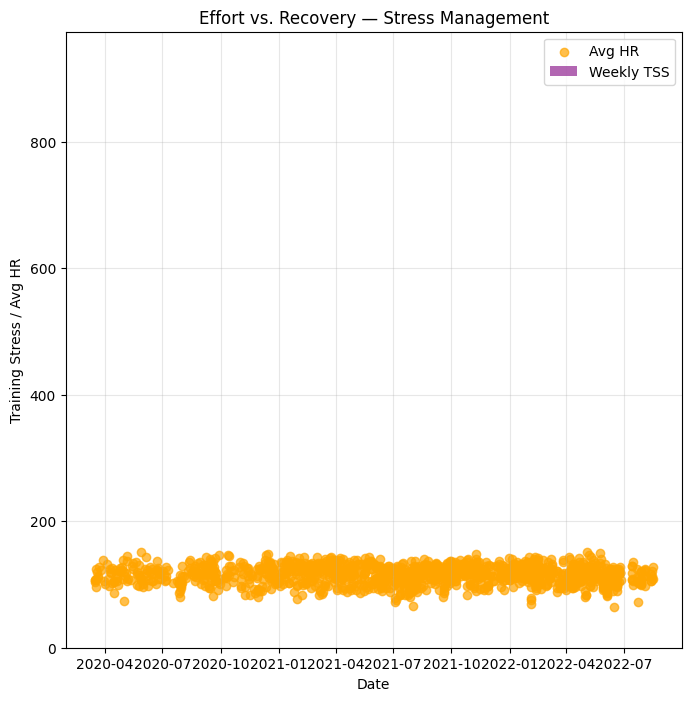

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# ------------------------------
# Inspect columns
print("Columns in CSV:", df.columns.tolist())

# Detect Training Stress Score column
tss_col = [c for c in df.columns if 'Training Stress' in c]
if not tss_col:
    raise ValueError("No column found containing 'Training Stress'.")
tss_col = tss_col[0]

# Detect Avg HR column
avg_hr_col = [c for c in df.columns if 'Avg HR' in c or 'Average Heart Rate' in c]
if not avg_hr_col:
    raise ValueError("No column found for Avg HR.")
avg_hr_col = avg_hr_col[0]

# Optional: Steps, Calories, Moving Time
steps_col = [c for c in df.columns if 'Steps' in c]
steps_col = steps_col[0] if steps_col else None
calories_col = [c for c in df.columns if 'Calories' in c]
calories_col = calories_col[0] if calories_col else None
moving_col = [c for c in df.columns if 'Moving Time' in c]
moving_col = moving_col[0] if moving_col else None

# ------------------------------
# Convert numeric columns
for col in [tss_col, avg_hr_col, steps_col, calories_col, moving_col]:
    if col:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing critical data
df = df.dropna(subset=['Date', tss_col, avg_hr_col])
df = df.sort_values('Date')

if df.empty:
    raise ValueError("No valid data found for Training Stress Score or Avg HR.")

# ------------------------------
# Compute rolling weekly average of Training Stress Score
df.set_index('Date', inplace=True)
weekly_tss = df[tss_col].rolling('7D').mean()

# ------------------------------
# Plot square chart
plt.figure(figsize=(8,8))

# Rolling weekly TSS bars
plt.bar(weekly_tss.index, weekly_tss.values, width=3, color='purple', alpha=0.6, label='Weekly TSS')

# Overlay Avg HR scatter
plt.scatter(df.index, df[avg_hr_col], color='orange', alpha=0.7, label='Avg HR')

plt.xlabel('Date')
plt.ylabel('Training Stress / Avg HR')
plt.title('Effort vs. Recovery — Stress Management')
plt.grid(alpha=0.3)
plt.axis('square')  # Square chart for balanced axes
plt.legend()
plt.show()


/tmp/ipython-input-2210678291.py:90: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


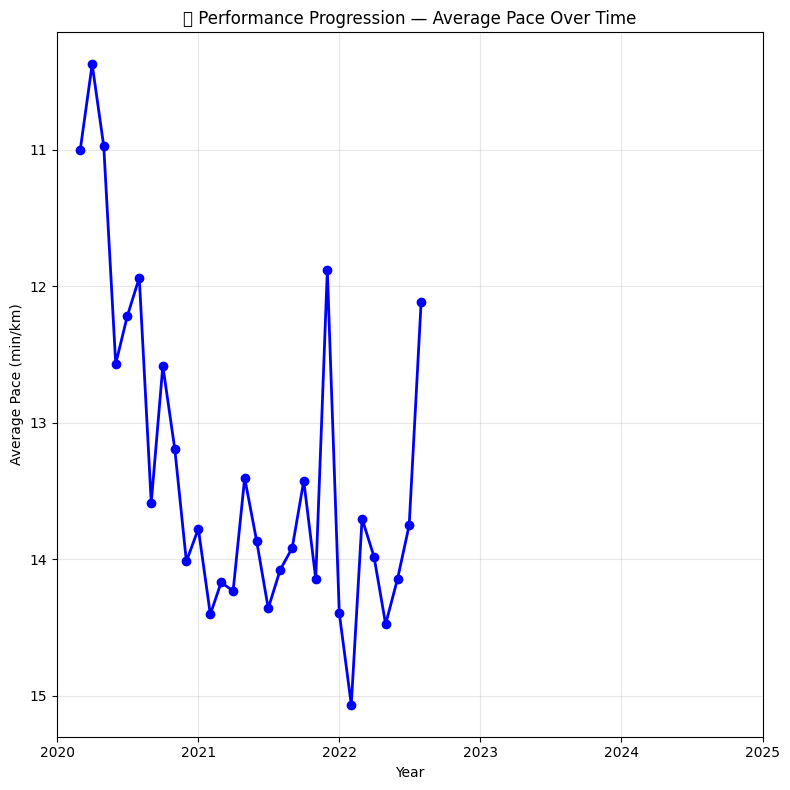

/tmp/ipython-input-2210678291.py:121: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


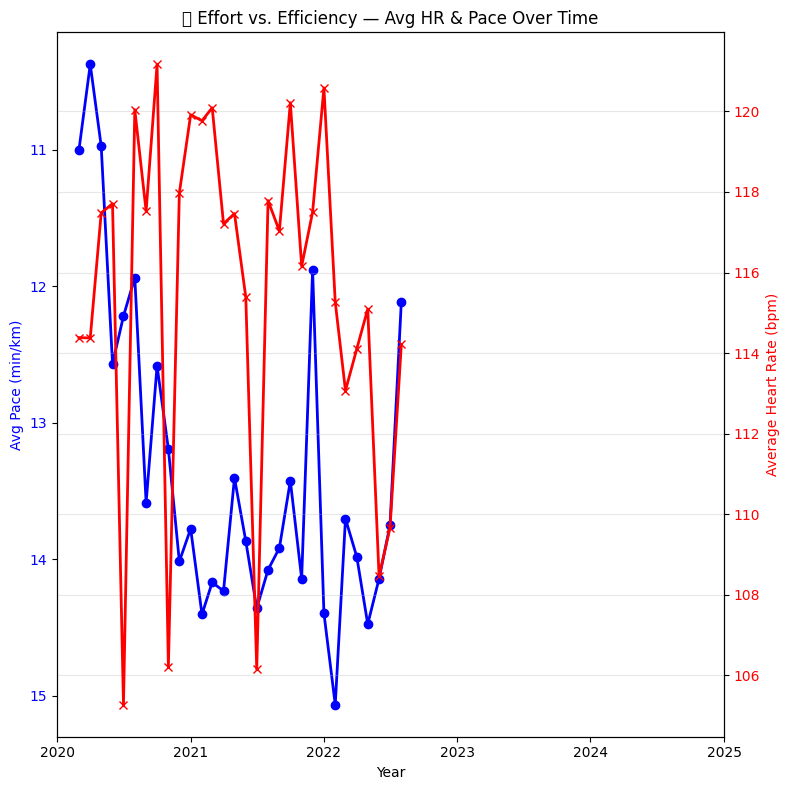

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# Load dataset
# ==============================
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# ==============================
# Detect relevant columns dynamically
# ==============================
def find_col(keyword):
    matches = [c for c in df.columns if keyword.lower() in c.lower()]
    return matches[0] if matches else None

date_col = find_col('Date')
avg_pace_col = find_col('Avg Pace')
best_pace_col = find_col('Best Pace')
avg_hr_col = find_col('Avg HR')
ascent_col = find_col('Total Ascent')

if not date_col or not avg_pace_col or not avg_hr_col:
    raise ValueError("Missing required columns. Ensure Date, Avg Pace, and Avg HR exist in your CSV.")

# ==============================
# Clean and convert columns
# ==============================
df = df[[date_col, avg_pace_col, best_pace_col, avg_hr_col, ascent_col]].copy()
df = df.replace(['--', 'NaN', '', ' '], pd.NA)

# Convert dates
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Convert Avg Pace and Best Pace to minutes
def pace_to_minutes(pace):
    try:
        parts = [float(p) for p in str(pace).split(':')]
        if len(parts) == 3:  # HH:MM:SS
            return parts[0]*60 + parts[1] + parts[2]/60
        elif len(parts) == 2:  # MM:SS
            return parts[0] + parts[1]/60
        else:
            return float(pace)
    except:
        return np.nan

df[avg_pace_col] = df[avg_pace_col].apply(pace_to_minutes)
if best_pace_col:
    df[best_pace_col] = df[best_pace_col].apply(pace_to_minutes)

# Convert numeric columns
for col in [avg_hr_col, ascent_col]:
    if col:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=[date_col, avg_pace_col, avg_hr_col])
df = df.sort_values(date_col)

# ==============================
# Compute monthly averages
# ==============================
df['Month'] = df[date_col].dt.to_period('M')
monthly = df.groupby('Month').agg({
    avg_pace_col: 'mean',
    avg_hr_col: 'mean',
    ascent_col: 'mean'
}).reset_index()

monthly['Month'] = monthly['Month'].dt.to_timestamp()
monthly['Year'] = monthly['Month'].dt.year

# Filter between 2020–2025
monthly = monthly[(monthly['Year'] >= 2020) & (monthly['Year'] <= 2025)]

# ==============================
# Visualization 1: Avg Pace over Time
# ==============================
plt.figure(figsize=(8,8))
plt.plot(monthly['Month'], monthly[avg_pace_col], color='blue', marker='o', linewidth=2)
plt.gca().invert_yaxis()  # Lower pace = better performance
plt.title("📉 Performance Progression — Average Pace Over Time")
plt.xlabel("Year")
plt.ylabel("Average Pace (min/km)")
plt.grid(alpha=0.3)
plt.xticks(pd.date_range('2020-01-01', '2025-12-31', freq='YS'),
           labels=[str(y) for y in range(2020, 2026)])
plt.tight_layout()
plt.show()

# ==============================
# Visualization 2: Dual Axis Chart (Avg HR & Avg Pace)
# ==============================
fig, ax1 = plt.subplots(figsize=(8,8))

# Avg Pace line (blue)
ax1.plot(monthly['Month'], monthly[avg_pace_col], color='blue', marker='o', linewidth=2, label='Avg Pace')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Pace (min/km)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.invert_yaxis()

# Second Y-axis for Avg HR (red)
ax2 = ax1.twinx()
ax2.plot(monthly['Month'], monthly[avg_hr_col], color='red', marker='x', linewidth=2, label='Avg HR')
ax2.set_ylabel('Average Heart Rate (bpm)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and formatting
plt.title("🧠 Effort vs. Efficiency — Avg HR & Pace Over Time")
plt.grid(alpha=0.3)

# Year ticks only
ax1.set_xticks(pd.date_range('2020-01-01', '2025-12-31', freq='YS'))
ax1.set_xticklabels([str(y) for y in range(2020, 2026)])

# Fix: avoid 'square' aspect, but keep equal width/height figure
fig.set_size_inches(8, 8)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2309254625.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M').agg({
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


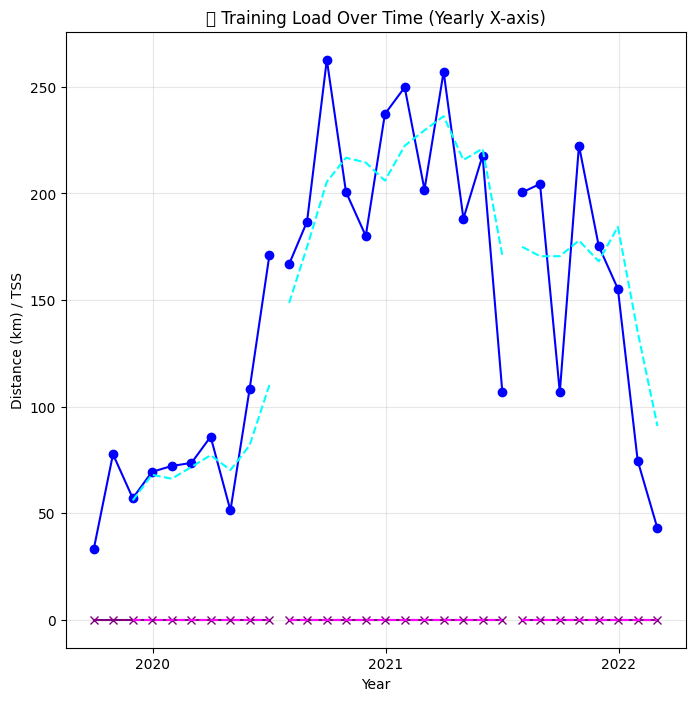

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


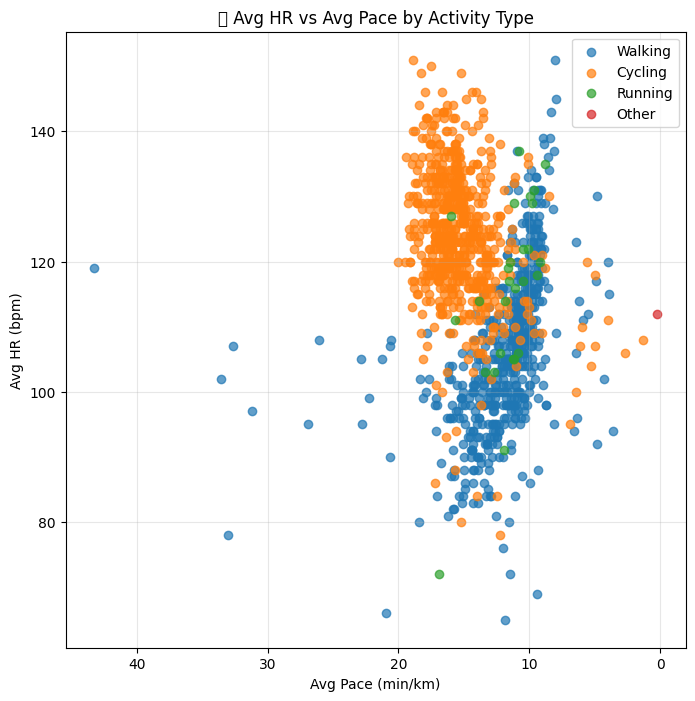

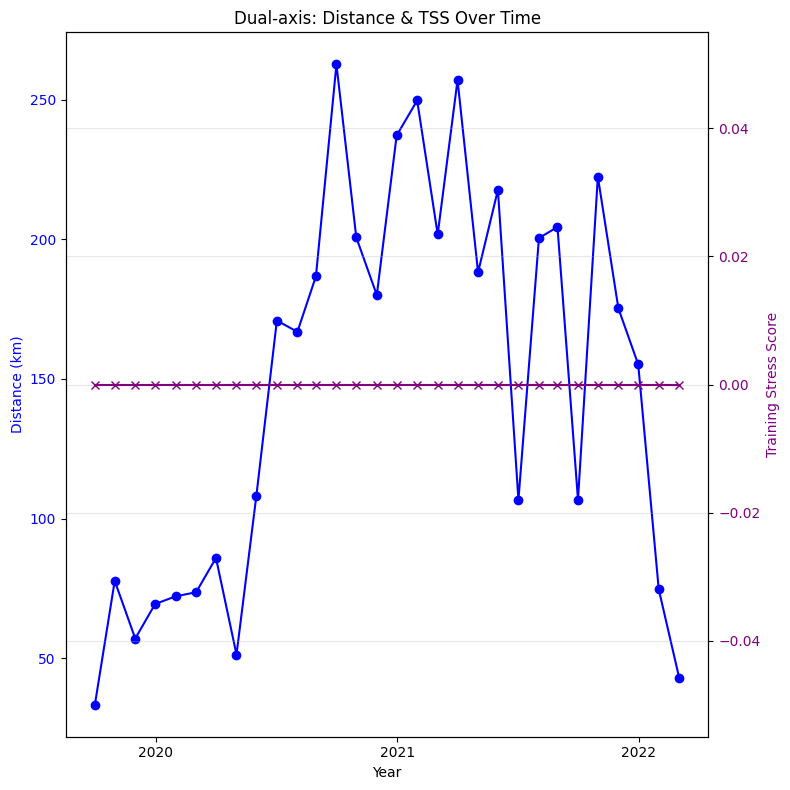

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# Load dataset
# ==============================
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# ==============================
# Dynamic column detection
# ==============================
def find_col(keyword):
    matches = [c for c in df.columns if keyword.lower() in c.lower()]
    return matches[0] if matches else None

date_col = find_col('Date')
distance_col = find_col('Distance')
tss_col = find_col('Training Stress')
avg_hr_col = find_col('Avg HR')
avg_pace_col = find_col('Avg Pace')
activity_type_col = find_col('Activity Type')

# ==============================
# Clean and convert columns
# ==============================
df = df[[date_col, distance_col, tss_col, avg_hr_col, avg_pace_col, activity_type_col]].copy()
df = df.replace(['--', 'NaN', '', ' '], pd.NA)

for col in [distance_col, tss_col, avg_hr_col]:
    if col:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Avg Pace to minutes
def pace_to_minutes(pace):
    try:
        parts = [float(p) for p in str(pace).split(':')]
        if len(parts) == 3:
            return parts[0]*60 + parts[1] + parts[2]/60
        elif len(parts) == 2:
            return parts[0] + parts[1]/60
        else:
            return float(pace)
    except:
        return np.nan

df[avg_pace_col] = df[avg_pace_col].apply(pace_to_minutes)
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col, distance_col, avg_hr_col])
df = df.sort_values(date_col)

# ==============================
# Monthly aggregation
# ==============================
df.set_index(date_col, inplace=True)
monthly = df.resample('M').agg({
    distance_col: 'sum',
    tss_col: 'sum' if tss_col else 'mean',
    avg_hr_col: 'mean',
    avg_pace_col: 'mean'
}).reset_index()

monthly['Year'] = monthly[date_col].dt.year

# Compute 3-month moving averages
monthly['Distance_MA'] = monthly[distance_col].rolling(3).mean()
if tss_col:
    monthly['TSS_MA'] = monthly[tss_col].rolling(3).mean()

# ==============================
# Visualization 1: Line chart — Distance/TSS over years
# ==============================
plt.figure(figsize=(8,8))
for y in sorted(monthly['Year'].unique()):
    subset = monthly[monthly['Year']==y]
    plt.plot(subset[date_col], subset[distance_col], marker='o', color='blue')
    plt.plot(subset[date_col], subset['Distance_MA'], color='cyan', linestyle='--')

    if tss_col:
        plt.plot(subset[date_col], subset[tss_col], marker='x', color='purple')
        plt.plot(subset[date_col], subset['TSS_MA'], color='magenta', linestyle='--')

plt.title("📈 Training Load Over Time (Yearly X-axis)")
plt.xlabel("Year")
plt.ylabel("Distance (km) / TSS")
plt.grid(alpha=0.3)

# X-axis: one tick per year
years = sorted(monthly['Year'].unique())
plt.xticks(pd.to_datetime([f'{y}-07-01' for y in years]), labels=years)

plt.show()

# ==============================
# Visualization 2: Scatter plot Avg HR vs Avg Pace by Activity Type
# ==============================
plt.figure(figsize=(8,8))
activity_types = df[activity_type_col].dropna().unique() if activity_type_col else ['All']
for act in activity_types:
    subset = df[df[activity_type_col]==act] if activity_type_col else df
    plt.scatter(subset[avg_pace_col], subset[avg_hr_col], alpha=0.7, label=act)

plt.xlabel("Avg Pace (min/km)")
plt.ylabel("Avg HR (bpm)")
plt.title("🧮 Avg HR vs Avg Pace by Activity Type")
plt.gca().invert_xaxis()
plt.grid(alpha=0.3)
plt.gca().set_aspect(aspect='auto')
plt.legend()
plt.show()

# ==============================
# Optional Dual-axis chart (Distance & TSS)
# ==============================
if tss_col:
    fig, ax1 = plt.subplots(figsize=(8,8))
    ax1.plot(monthly[date_col], monthly[distance_col], color='blue', marker='o', label='Distance')
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Distance (km)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(monthly[date_col], monthly[tss_col], color='purple', marker='x', label='TSS')
    ax2.set_ylabel("Training Stress Score", color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')

    plt.title("Dual-axis: Distance & TSS Over Time")
    plt.grid(alpha=0.3)

    # X-axis: only years
    ax1.set_xticks(pd.to_datetime([f'{y}-07-01' for y in years]))
    ax1.set_xticklabels(years)

    fig.set_size_inches(8,8)
    fig.tight_layout()
    plt.show()


<Figure size 1000x1000 with 0 Axes>

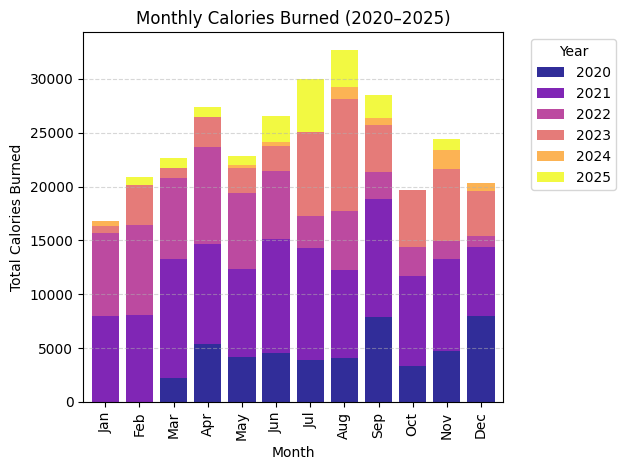

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_clean and pivot_data from your last step are correct

# Map month numbers to names
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
pivot_data = pivot_data.sort_index()  # ensure months are in order
pivot_data.index = [month_labels[m-1] for m in pivot_data.index]

# Plot stacked bar chart
plt.figure(figsize=(10,10))  # square figure

ax = pivot_data.plot(
    kind='bar',
    stacked=True,
    colormap='plasma',
    alpha=0.85,
    width=0.8
)

plt.xlabel("Month")
plt.ylabel("Total Calories Burned")
plt.title("Monthly Calories Burned (2020–2025)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Year", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 0 Axes>

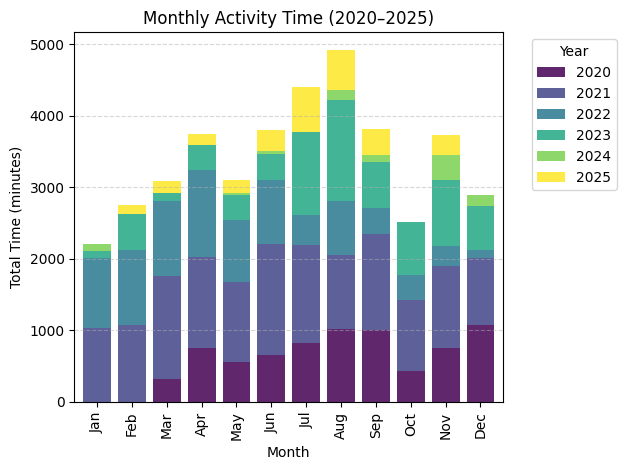

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load Dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Data Cleaning ===
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert Time to total minutes
def time_to_minutes(t):
    try:
        h, m, s = str(t).split(':')
        return int(h)*60 + int(m) + float(s)/60
    except:
        return None

df['Time_min'] = df['Time'].apply(time_to_minutes)
df_clean = df.dropna(subset=['Date','Time_min']).copy()

# Filter years 2020–2025
df_clean = df_clean[df_clean['Date'].dt.year.between(2020,2025)].copy()

# Extract Year and Month
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

# === Aggregate Time by Month and Year ===
monthly_time = df_clean.groupby(['Month','Year'])['Time_min'].sum().reset_index()

# Pivot for stacked bars
pivot_data = monthly_time.pivot(index='Month', columns='Year', values='Time_min').fillna(0)
pivot_data = pivot_data.sort_index()

# Map month numbers to short names
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
pivot_data.index = [month_labels[m-1] for m in pivot_data.index]

# === Plot Stacked Bar Chart ===
plt.figure(figsize=(10,10))  # square figure

ax = pivot_data.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    alpha=0.85,
    width=0.8
)

plt.xlabel("Month")
plt.ylabel("Total Time (minutes)")
plt.title("Monthly Activity Time (2020–2025)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Year", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


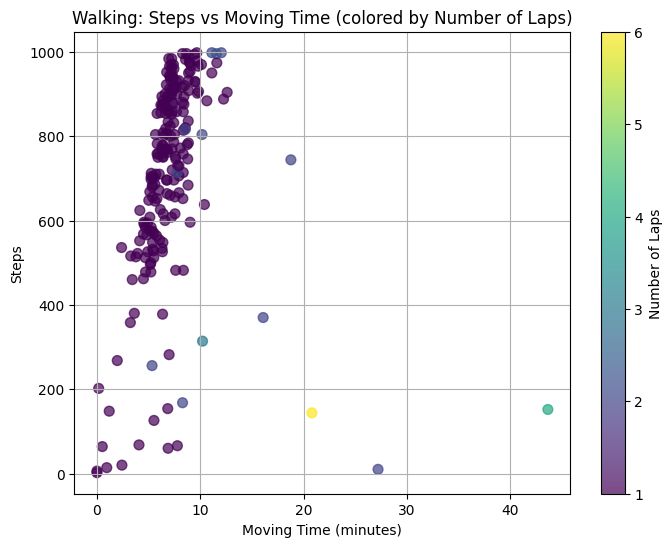

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Filter walking activities
df_walk = df[df['Activity Type'].str.strip() == 'Walking'].copy()

# Convert time columns to minutes
def time_to_min(t):
    try:
        h, m, s = str(t).split(':')
        return int(h)*60 + int(m) + float(s)/60
    except:
        return None

df_walk['Moving Time_min'] = df_walk['Moving Time'].apply(time_to_min)
df_walk['Elapsed Time_min'] = df_walk['Elapsed Time'].apply(time_to_min)
df_walk['Best Lap Time_min'] = df_walk['Best Lap Time'].apply(time_to_min)

# Convert Steps, Number of Laps to numeric
df_walk['Steps'] = pd.to_numeric(df_walk['Steps'], errors='coerce')
df_walk['Number of Laps'] = pd.to_numeric(df_walk['Number of Laps'], errors='coerce')

# Drop invalid rows
df_walk = df_walk.dropna(subset=['Steps','Moving Time_min','Best Lap Time_min','Number of Laps'])

# Scatter plot: Steps vs Moving Time
plt.figure(figsize=(8,6))
plt.scatter(df_walk['Moving Time_min'], df_walk['Steps'], c=df_walk['Number of Laps'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Number of Laps')
plt.xlabel("Moving Time (minutes)")
plt.ylabel("Steps")
plt.title("Walking: Steps vs Moving Time (colored by Number of Laps)")
plt.grid(True)
plt.show()


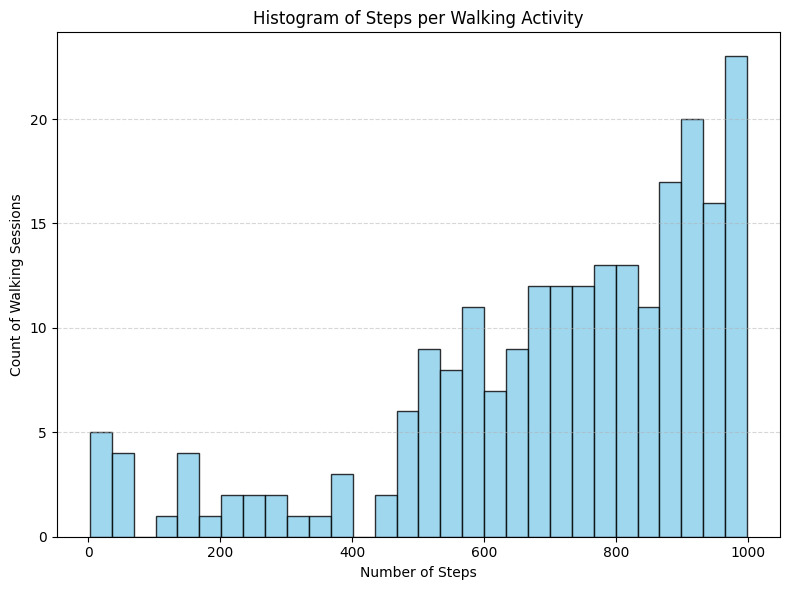

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load Dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter Walking Activities ===
df_walk = df[df['Activity Type'].str.strip() == 'Walking'].copy()

# Convert Steps to numeric
df_walk['Steps'] = pd.to_numeric(df_walk['Steps'], errors='coerce')

# Drop invalid steps
df_walk = df_walk.dropna(subset=['Steps'])

# === Plot Histogram ===
plt.figure(figsize=(8,6))
plt.hist(df_walk['Steps'], bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel("Number of Steps")
plt.ylabel("Count of Walking Sessions")
plt.title("Histogram of Steps per Walking Activity")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


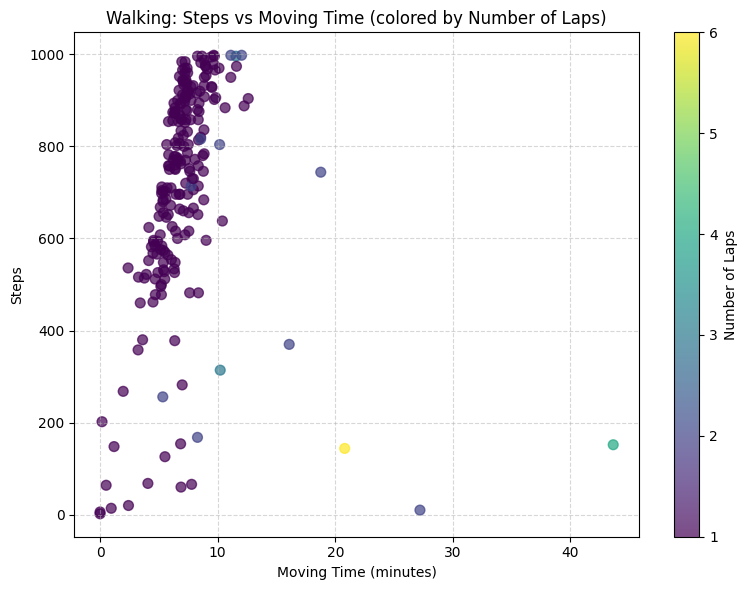

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load Dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter Walking Activities ===
df_walk = df[df['Activity Type'].str.strip() == 'Walking'].copy()

# Convert Steps and Number of Laps to numeric
df_walk['Steps'] = pd.to_numeric(df_walk['Steps'], errors='coerce')
df_walk['Number of Laps'] = pd.to_numeric(df_walk['Number of Laps'], errors='coerce')

# Convert Moving Time to minutes (HH:MM:SS)
def time_to_min(t):
    try:
        h, m, s = str(t).split(':')
        return int(h)*60 + int(m) + float(s)/60
    except:
        return None

df_walk['Moving Time_min'] = df_walk['Moving Time'].apply(time_to_min)

# Drop invalid rows
df_walk = df_walk.dropna(subset=['Steps','Moving Time_min','Number of Laps'])

# === Scatter Plot ===
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df_walk['Moving Time_min'],
    df_walk['Steps'],
    c=df_walk['Number of Laps'],
    cmap='viridis',
    s=50,
    alpha=0.7
)
plt.colorbar(scatter, label='Number of Laps')
plt.xlabel("Moving Time (minutes)")
plt.ylabel("Steps")
plt.title("Walking: Steps vs Moving Time (colored by Number of Laps)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

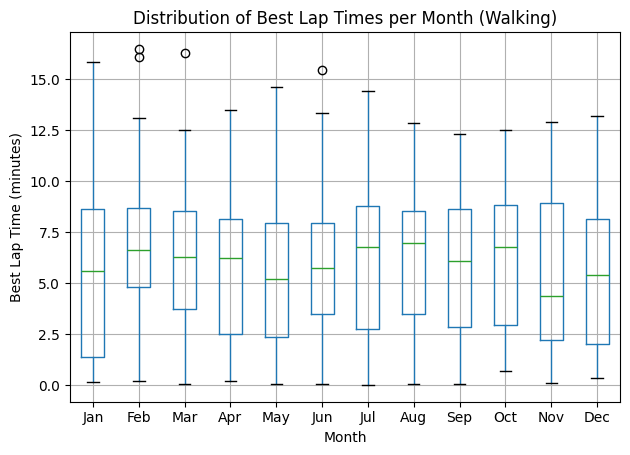

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load Dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter Walking Activities ===
df_walk = df[df['Activity Type'].str.strip() == 'Walking'].copy()

# Convert Best Lap Time to minutes
def time_to_min(t):
    try:
        h, m, s = str(t).split(':')
        return int(h)*60 + int(m) + float(s)/60
    except:
        return None

df_walk['Best Lap Time_min'] = df_walk['Best Lap Time'].apply(time_to_min)

# Drop rows with missing Best Lap Time
df_walk = df_walk.dropna(subset=['Best Lap Time_min'])

# Optionally, group by month
df_walk['Month'] = pd.to_datetime(df_walk['Date'], errors='coerce').dt.month

# === Boxplot: Best Lap Time per Month ===
plt.figure(figsize=(10,6))
df_walk.boxplot(column='Best Lap Time_min', by='Month', grid=True)
plt.xlabel("Month")
plt.ylabel("Best Lap Time (minutes)")
plt.title("Distribution of Best Lap Times per Month (Walking)")
plt.suptitle("")  # remove the automatic 'Boxplot grouped by Month' title
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()


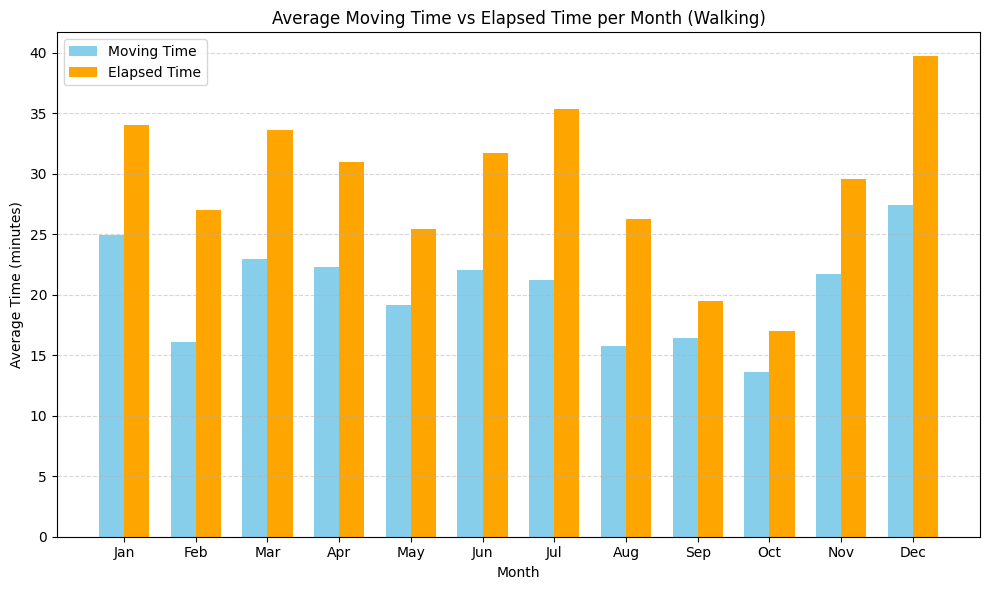

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load Dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter Walking Activities ===
df_walk = df[df['Activity Type'].str.strip() == 'Walking'].copy()

# Convert Moving Time and Elapsed Time to minutes
def time_to_min(t):
    try:
        h, m, s = str(t).split(':')
        return int(h)*60 + int(m) + float(s)/60
    except:
        return None

df_walk['Moving Time_min'] = df_walk['Moving Time'].apply(time_to_min)
df_walk['Elapsed Time_min'] = df_walk['Elapsed Time'].apply(time_to_min)

# Drop rows with missing time
df_walk = df_walk.dropna(subset=['Moving Time_min', 'Elapsed Time_min'])

# Extract Month
df_walk['Month'] = pd.to_datetime(df_walk['Date'], errors='coerce').dt.month

# Aggregate average Moving and Elapsed Time per month
monthly_avg = df_walk.groupby('Month')[['Moving Time_min','Elapsed Time_min']].mean().reset_index()

# Map month numbers to labels
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_avg['Month_Label'] = monthly_avg['Month'].apply(lambda x: month_labels[x-1])

# === Plot Side-by-Side Bar Chart ===
x = range(len(monthly_avg))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar([i - width/2 for i in x], monthly_avg['Moving Time_min'], width=width, color='skyblue', label='Moving Time')
plt.bar([i + width/2 for i in x], monthly_avg['Elapsed Time_min'], width=width, color='orange', label='Elapsed Time')

plt.xticks(x, monthly_avg['Month_Label'])
plt.xlabel("Month")
plt.ylabel("Average Time (minutes)")
plt.title("Average Moving Time vs Elapsed Time per Month (Walking)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


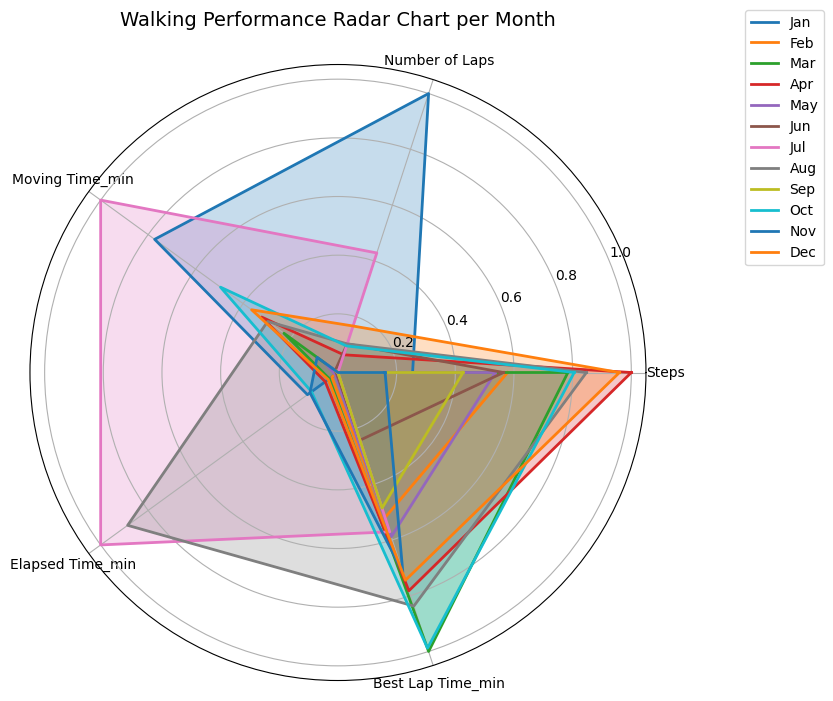

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter Walking Activities ===
df_walk = df[df['Activity Type'].str.strip() == 'Walking'].copy()

# Convert time columns to minutes
def time_to_min(t):
    try:
        h, m, s = str(t).split(':')
        return int(h)*60 + int(m) + float(s)/60
    except:
        return None

df_walk['Moving Time_min'] = df_walk['Moving Time'].apply(time_to_min)
df_walk['Elapsed Time_min'] = df_walk['Elapsed Time'].apply(time_to_min)
df_walk['Best Lap Time_min'] = df_walk['Best Lap Time'].apply(time_to_min)

# Convert Steps and Number of Laps to numeric
df_walk['Steps'] = pd.to_numeric(df_walk['Steps'], errors='coerce')
df_walk['Number of Laps'] = pd.to_numeric(df_walk['Number of Laps'], errors='coerce')

# Drop invalid rows
df_walk = df_walk.dropna(subset=['Steps','Number of Laps','Moving Time_min','Elapsed Time_min','Best Lap Time_min'])

# Extract month
df_walk['Month'] = pd.to_datetime(df_walk['Date'], errors='coerce').dt.month

# === Aggregate mean metrics per month ===
monthly_metrics = df_walk.groupby('Month')[['Steps','Number of Laps','Moving Time_min','Elapsed Time_min','Best Lap Time_min']].mean()

# Normalize each metric to 0-1 for comparability
monthly_metrics_norm = (monthly_metrics - monthly_metrics.min()) / (monthly_metrics.max() - monthly_metrics.min())

# Radar chart setup
labels = monthly_metrics_norm.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Map month numbers to names
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Plot radar chart
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
cmap = plt.get_cmap('tab10')

for i, month in enumerate(monthly_metrics_norm.index):
    values = monthly_metrics_norm.loc[month].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, color=cmap(i % 10), linewidth=2, label=month_names[month-1])
    ax.fill(angles, values, color=cmap(i % 10), alpha=0.25)

# Set axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add title and legend
plt.title("Walking Performance Radar Chart per Month", size=14, y=1.05)
ax.legend(loc='upper right', bbox_to_anchor=(1.3,1.1))

plt.show()


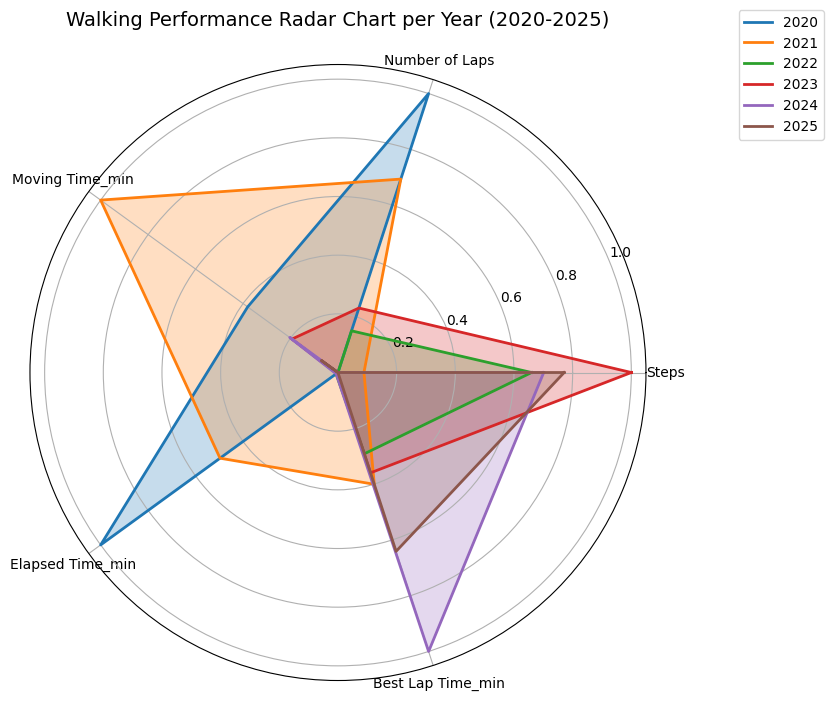

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter Walking Activities ===
df_walk = df[df['Activity Type'].str.strip() == 'Walking'].copy()

# Convert time columns to minutes
def time_to_min(t):
    try:
        h, m, s = str(t).split(':')
        return int(h)*60 + int(m) + float(s)/60
    except:
        return None

df_walk['Moving Time_min'] = df_walk['Moving Time'].apply(time_to_min)
df_walk['Elapsed Time_min'] = df_walk['Elapsed Time'].apply(time_to_min)
df_walk['Best Lap Time_min'] = df_walk['Best Lap Time'].apply(time_to_min)

# Convert Steps and Number of Laps to numeric
df_walk['Steps'] = pd.to_numeric(df_walk['Steps'], errors='coerce')
df_walk['Number of Laps'] = pd.to_numeric(df_walk['Number of Laps'], errors='coerce')

# Drop invalid rows
df_walk = df_walk.dropna(subset=['Steps','Number of Laps','Moving Time_min','Elapsed Time_min','Best Lap Time_min'])

# Extract year
df_walk['Year'] = pd.to_datetime(df_walk['Date'], errors='coerce').dt.year

# Filter for years 2020 to 2025
df_walk = df_walk[df_walk['Year'].between(2020, 2025)]

# === Aggregate mean metrics per year ===
yearly_metrics = df_walk.groupby('Year')[['Steps','Number of Laps','Moving Time_min','Elapsed Time_min','Best Lap Time_min']].mean()

# Normalize each metric to 0-1 for comparability
yearly_metrics_norm = (yearly_metrics - yearly_metrics.min()) / (yearly_metrics.max() - yearly_metrics.min())

# Radar chart setup
labels = yearly_metrics_norm.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Plot radar chart
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
cmap = plt.get_cmap('tab10')

for i, year in enumerate(yearly_metrics_norm.index):
    values = yearly_metrics_norm.loc[year].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, color=cmap(i % 10), linewidth=2, label=str(year))
    ax.fill(angles, values, color=cmap(i % 10), alpha=0.25)

# Set axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add title and legend
plt.title("Walking Performance Radar Chart per Year (2020-2025)", size=14, y=1.05)
ax.legend(loc='upper right', bbox_to_anchor=(1.3,1.1))

plt.show()


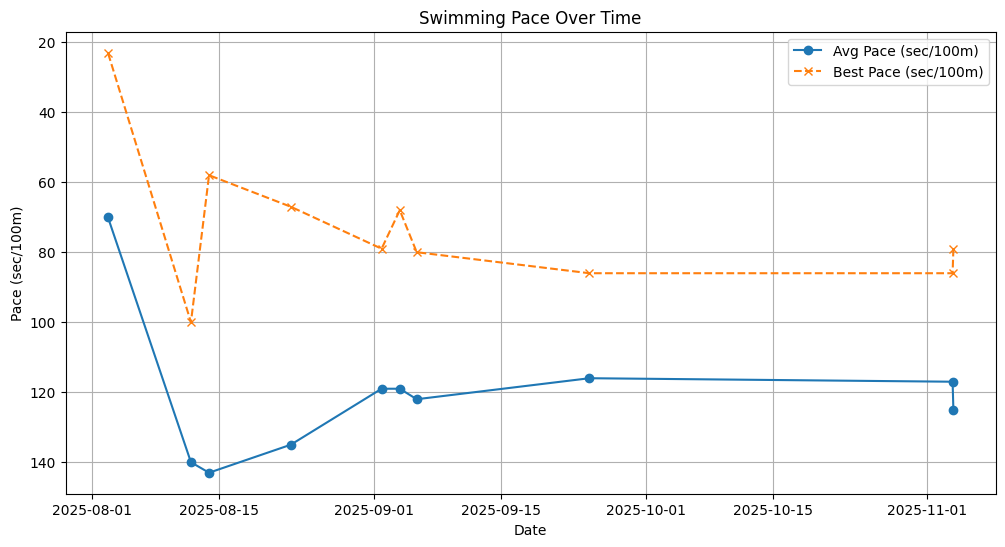

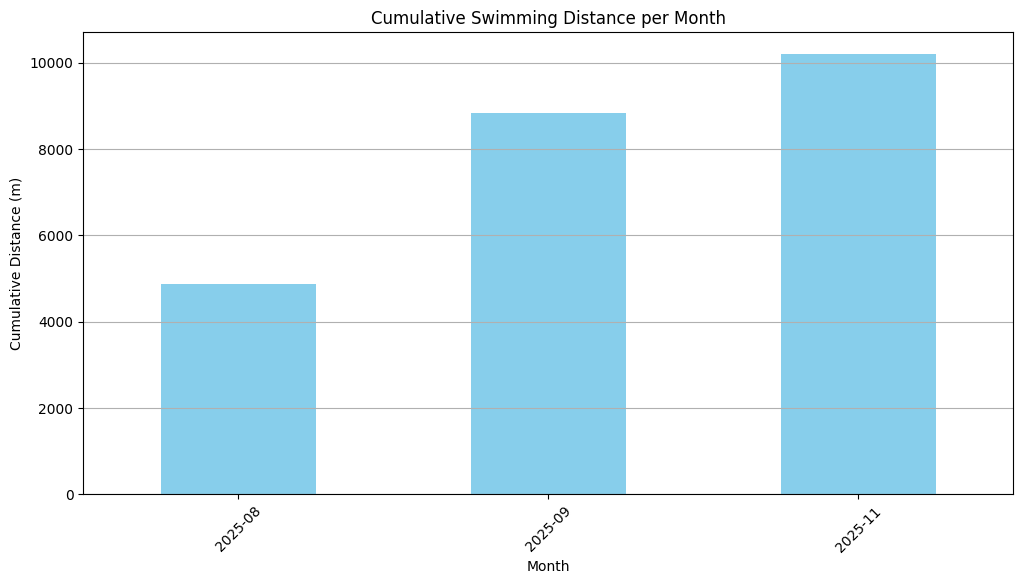

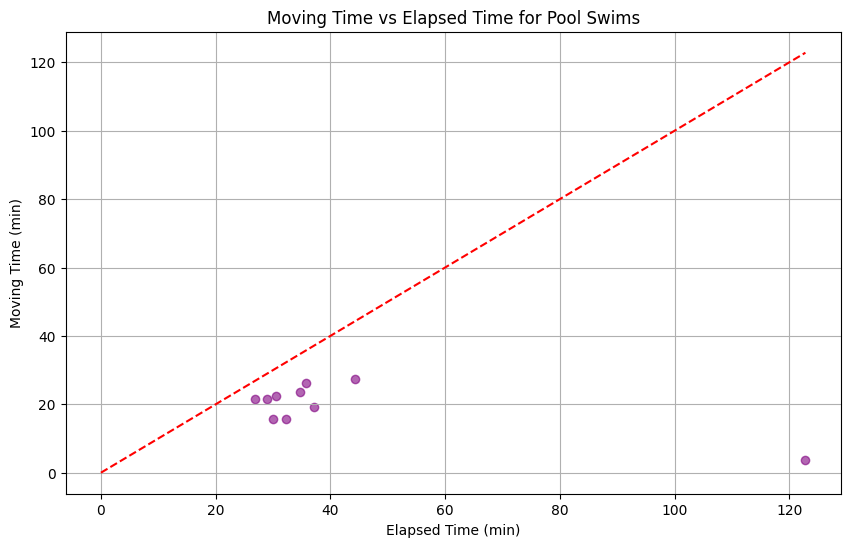

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter for Pool Swim ===
df_swim = df[df['Title'].str.strip() == 'Pool Swim'].copy()

# === Convert relevant columns ===
# Convert Avg Pace and Best Pace to seconds per 100m if needed
def pace_to_seconds(pace):
    try:
        m, s = str(pace).split(':')
        return int(m)*60 + float(s)
    except:
        return np.nan

df_swim['Avg Pace_sec'] = df_swim['Avg Pace'].apply(pace_to_seconds)
df_swim['Best Pace_sec'] = df_swim['Best Pace'].apply(pace_to_seconds)

# Convert Distance to numeric
df_swim['Distance'] = pd.to_numeric(df_swim['Distance'].str.replace(',',''), errors='coerce')

# Convert Moving Time and Elapsed Time to minutes
def time_to_min(t):
    try:
        h, m, s = str(t).split(':')
        return int(h)*60 + int(m) + float(s)/60
    except:
        return np.nan

df_swim['Moving Time_min'] = df_swim['Moving Time'].apply(time_to_min)
df_swim['Elapsed Time_min'] = df_swim['Elapsed Time'].apply(time_to_min)

# Convert Date to datetime
df_swim['Date'] = pd.to_datetime(df_swim['Date'], errors='coerce')

# Drop rows with missing key metrics
df_swim = df_swim.dropna(subset=['Avg Pace_sec','Best Pace_sec','Distance','Date'])

# === Line chart: Avg Pace and Best Pace over time ===
plt.figure(figsize=(12,6))
plt.plot(df_swim['Date'], df_swim['Avg Pace_sec'], marker='o', linestyle='-', label='Avg Pace (sec/100m)')
plt.plot(df_swim['Date'], df_swim['Best Pace_sec'], marker='x', linestyle='--', label='Best Pace (sec/100m)')
plt.gca().invert_yaxis()  # Lower pace = faster, so invert y-axis
plt.xlabel('Date')
plt.ylabel('Pace (sec/100m)')
plt.title('Swimming Pace Over Time')
plt.legend()
plt.grid(True)
plt.show()

# === Cumulative Distance per Month ===
df_swim['Month'] = df_swim['Date'].dt.to_period('M')
monthly_distance = df_swim.groupby('Month')['Distance'].sum().cumsum()  # cumulative distance

plt.figure(figsize=(12,6))
monthly_distance.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Cumulative Distance (m)')
plt.title('Cumulative Swimming Distance per Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# === Optional: Moving Time vs Elapsed Time scatter plot ===
plt.figure(figsize=(10,6))
plt.scatter(df_swim['Elapsed Time_min'], df_swim['Moving Time_min'], c='purple', alpha=0.6)
plt.plot([0, max(df_swim['Elapsed Time_min'])], [0, max(df_swim['Elapsed Time_min'])], color='red', linestyle='--')
plt.xlabel('Elapsed Time (min)')
plt.ylabel('Moving Time (min)')
plt.title('Moving Time vs Elapsed Time for Pool Swims')
plt.grid(True)
plt.show()


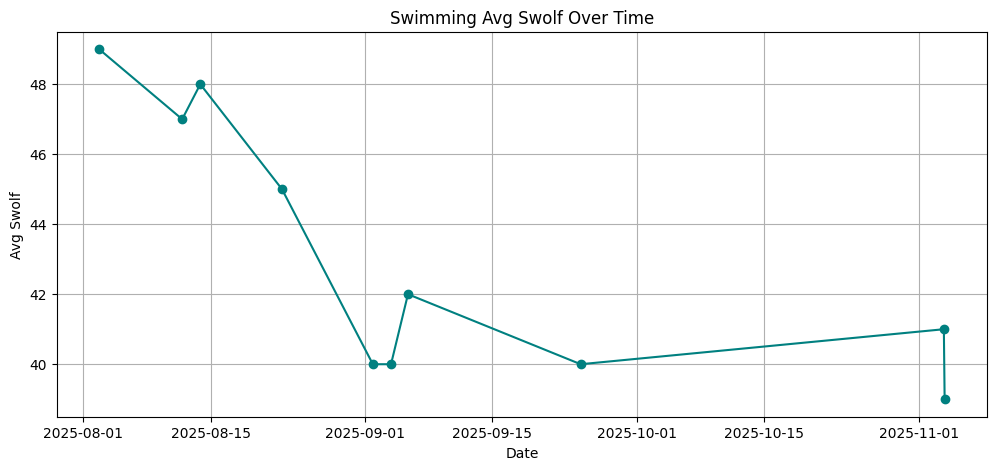

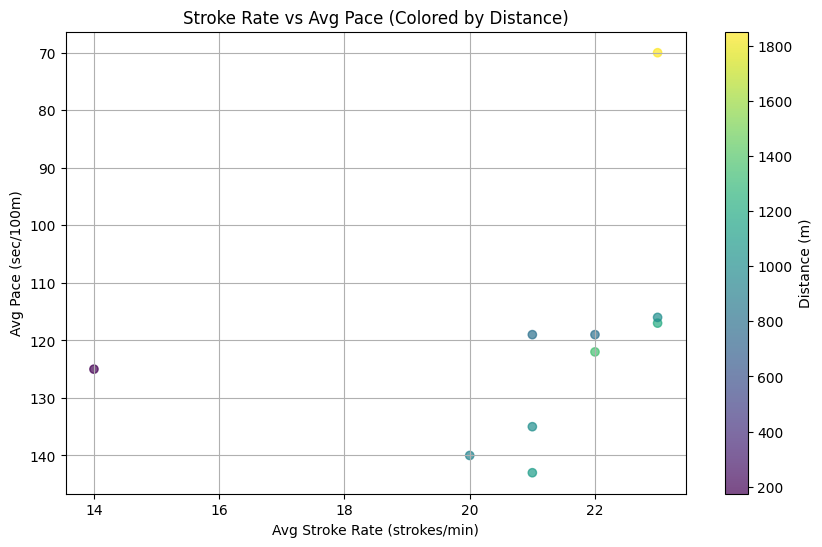

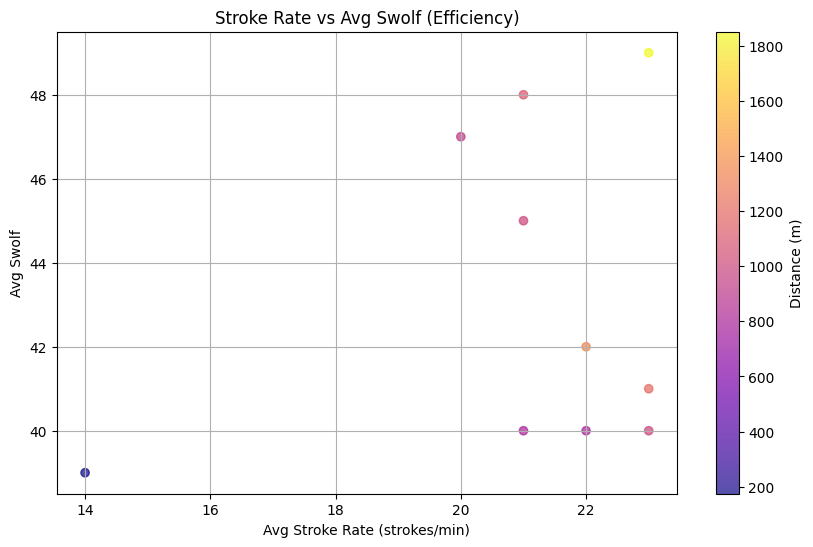

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter for Pool Swim ===
df_swim = df[df['Title'].str.strip() == 'Pool Swim'].copy()

# Convert relevant columns
def pace_to_seconds(pace):
    try:
        m, s = str(pace).split(':')
        return int(m)*60 + float(s)
    except:
        return np.nan

df_swim['Avg Pace_sec'] = df_swim['Avg Pace'].apply(pace_to_seconds)
df_swim['Best Pace_sec'] = df_swim['Best Pace'].apply(pace_to_seconds)
df_swim['Distance'] = pd.to_numeric(df_swim['Distance'].str.replace(',',''), errors='coerce')
df_swim['Total Strokes'] = pd.to_numeric(df_swim['Total Strokes'], errors='coerce')
df_swim['Avg. Swolf'] = pd.to_numeric(df_swim['Avg. Swolf'], errors='coerce')
df_swim['Avg Stroke Rate'] = pd.to_numeric(df_swim['Avg Stroke Rate'], errors='coerce')
df_swim['Date'] = pd.to_datetime(df_swim['Date'], errors='coerce')

# Drop rows with missing metrics
df_swim = df_swim.dropna(subset=['Avg Pace_sec','Distance','Total Strokes','Avg. Swolf','Avg Stroke Rate'])

# === Stroke efficiency ===
df_swim['Strokes_per_100m'] = df_swim['Total Strokes'] / (df_swim['Distance']/100)

# === Plot Avg Swolf over time ===
plt.figure(figsize=(12,5))
plt.plot(df_swim['Date'], df_swim['Avg. Swolf'], marker='o', linestyle='-', color='teal')
plt.xlabel('Date')
plt.ylabel('Avg Swolf')
plt.title('Swimming Avg Swolf Over Time')
plt.grid(True)
plt.show()

# === Scatter: Avg Stroke Rate vs Avg Pace ===
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_swim['Avg Stroke Rate'], df_swim['Avg Pace_sec'], c=df_swim['Distance'], cmap='viridis', alpha=0.7)
plt.xlabel('Avg Stroke Rate (strokes/min)')
plt.ylabel('Avg Pace (sec/100m)')
plt.title('Stroke Rate vs Avg Pace (Colored by Distance)')
cbar = plt.colorbar(scatter)
cbar.set_label('Distance (m)')
plt.gca().invert_yaxis()  # faster pace = lower sec
plt.grid(True)
plt.show()

# === Optional: Scatter: Avg Stroke Rate vs Avg Swolf ===
plt.figure(figsize=(10,6))
scatter2 = plt.scatter(df_swim['Avg Stroke Rate'], df_swim['Avg. Swolf'], c=df_swim['Distance'], cmap='plasma', alpha=0.7)
plt.xlabel('Avg Stroke Rate (strokes/min)')
plt.ylabel('Avg Swolf')
plt.title('Stroke Rate vs Avg Swolf (Efficiency)')
cbar2 = plt.colorbar(scatter2)
cbar2.set_label('Distance (m)')
plt.grid(True)
plt.show()


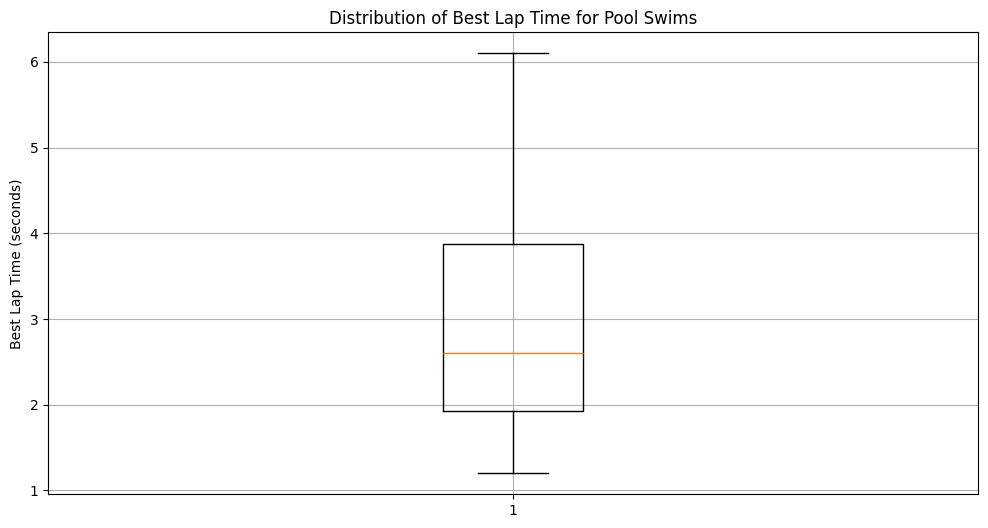

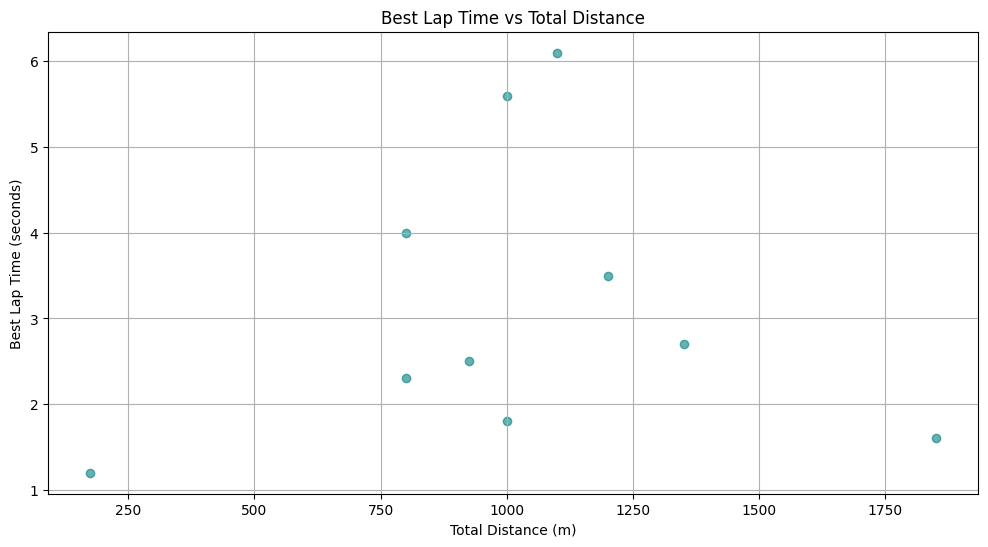

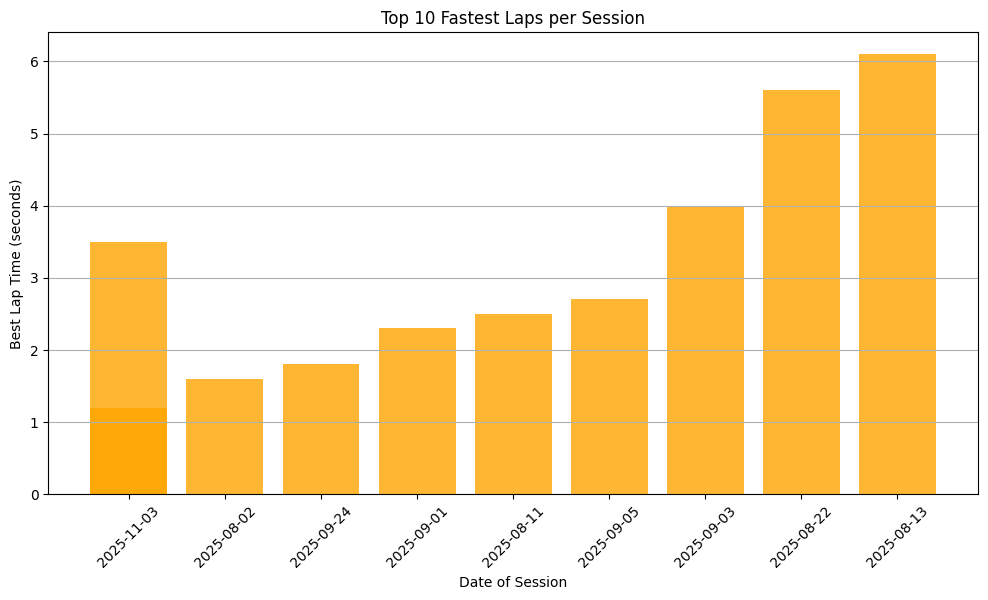

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter for Pool Swim ===
df_swim = df[df['Title'].str.strip() == 'Pool Swim'].copy()

# Convert relevant columns
def time_to_sec(t):
    """Convert hh:mm:ss or mm:ss string to total seconds"""
    try:
        parts = str(t).split(':')
        if len(parts) == 3:  # hh:mm:ss
            h, m, s = parts
            return int(h)*3600 + int(m)*60 + float(s)
        elif len(parts) == 2:  # mm:ss
            m, s = parts
            return int(m)*60 + float(s)
        else:
            return float(t)
    except:
        return np.nan

df_swim['Best Lap Time_sec'] = df_swim['Best Lap Time'].apply(time_to_sec)
df_swim['Distance'] = pd.to_numeric(df_swim['Distance'].str.replace(',',''), errors='coerce')
df_swim['Number of Laps'] = pd.to_numeric(df_swim['Number of Laps'], errors='coerce')
df_swim['Date'] = pd.to_datetime(df_swim['Date'], errors='coerce')

# Drop rows with missing metrics
df_swim = df_swim.dropna(subset=['Best Lap Time_sec','Number of Laps','Distance'])

# === Boxplot of Best Lap Time per session ===
plt.figure(figsize=(12,6))
plt.boxplot(df_swim['Best Lap Time_sec'], vert=True)
plt.ylabel('Best Lap Time (seconds)')
plt.title('Distribution of Best Lap Time for Pool Swims')
plt.grid(True)
plt.show()

# === Line chart: Best Lap Time vs Total Distance ===
plt.figure(figsize=(12,6))
plt.scatter(df_swim['Distance'], df_swim['Best Lap Time_sec'], c='teal', alpha=0.6)
plt.xlabel('Total Distance (m)')
plt.ylabel('Best Lap Time (seconds)')
plt.title('Best Lap Time vs Total Distance')
plt.grid(True)
plt.show()

# === Bar chart: Fastest Lap Time per session (top 10 fastest) ===
fastest_laps = df_swim.nsmallest(10, 'Best Lap Time_sec')
plt.figure(figsize=(12,6))
plt.bar(fastest_laps['Date'].dt.strftime('%Y-%m-%d'), fastest_laps['Best Lap Time_sec'], color='orange', alpha=0.8)
plt.xticks(rotation=45)
plt.ylabel('Best Lap Time (seconds)')
plt.xlabel('Date of Session')
plt.title('Top 10 Fastest Laps per Session')
plt.grid(axis='y')
plt.show()


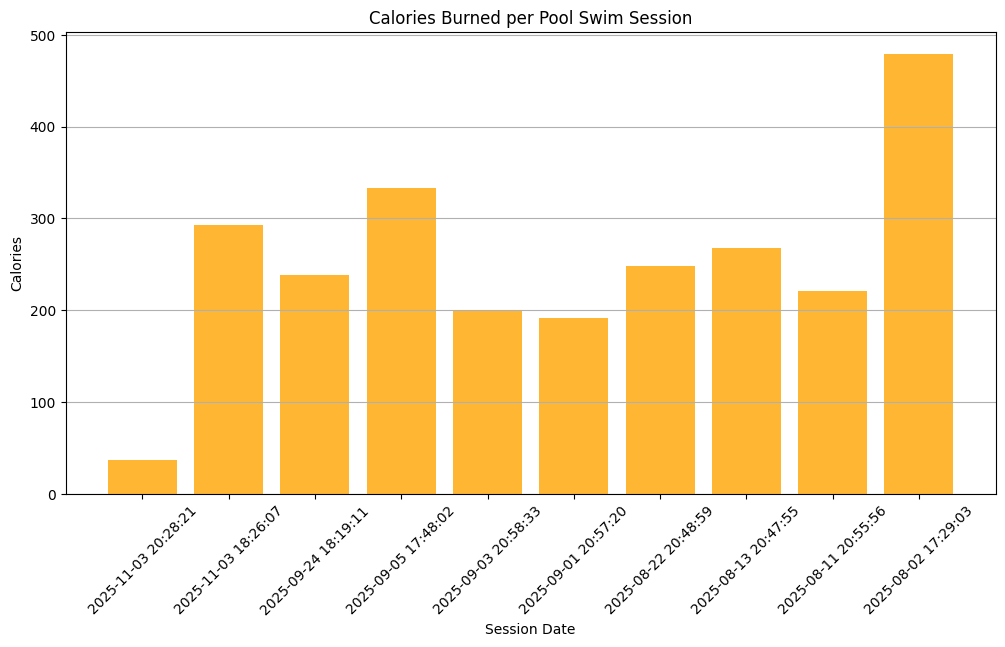

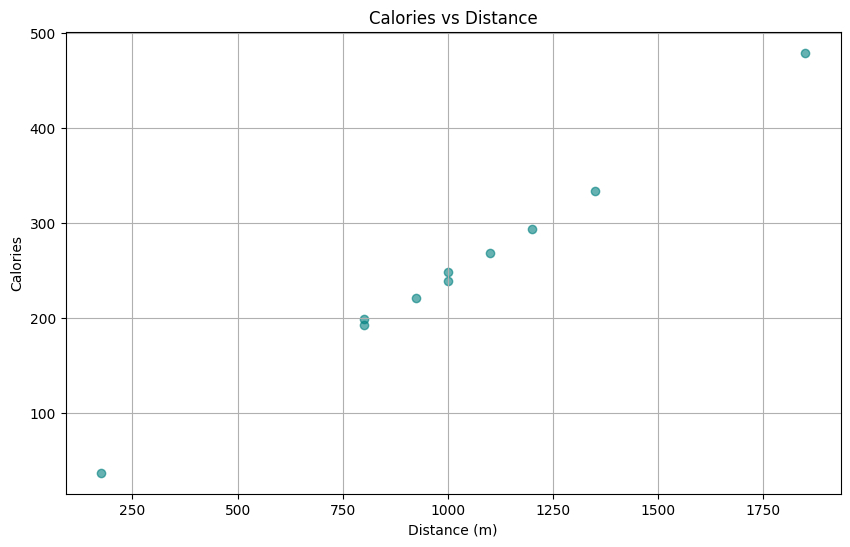

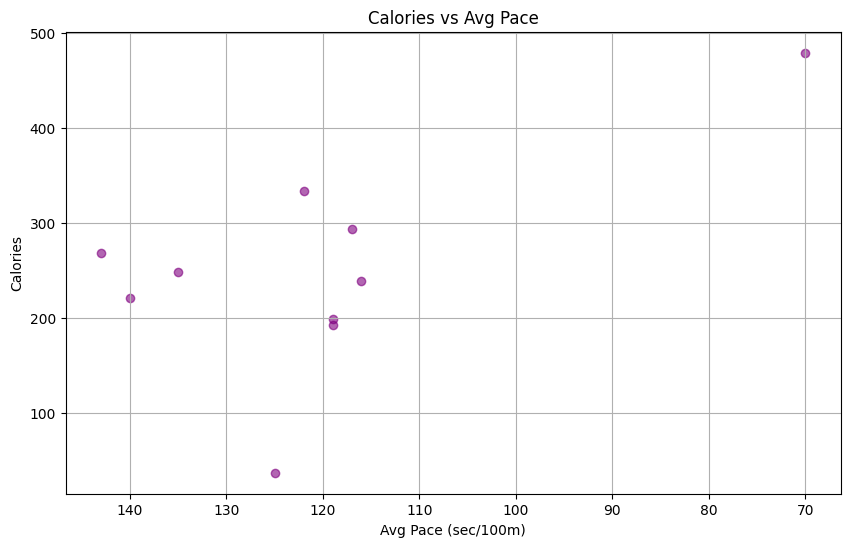

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter for Pool Swim ===
df_swim = df[df['Title'].str.strip() == 'Pool Swim'].copy()

# Convert columns to numeric
df_swim['Distance'] = pd.to_numeric(df_swim['Distance'].str.replace(',',''), errors='coerce')
df_swim['Calories'] = pd.to_numeric(df_swim['Calories'].str.replace(',',''), errors='coerce')

# Convert Time to minutes
def time_to_min(t):
    try:
        h, m, s = str(t).split(':')
        return int(h)*60 + int(m) + float(s)/60
    except:
        return np.nan

df_swim['Time_min'] = df_swim['Time'].apply(time_to_min)

# Convert Avg Pace to seconds
def pace_to_sec(pace):
    try:
        m, s = str(pace).split(':')
        return int(m)*60 + float(s)
    except:
        return np.nan

df_swim['Avg Pace_sec'] = df_swim['Avg Pace'].apply(pace_to_sec)

# Drop rows with missing key metrics
df_swim = df_swim.dropna(subset=['Calories','Distance','Time_min','Avg Pace_sec'])

# === Calculate Calories per 100m and per minute ===
df_swim['Calories_per_100m'] = df_swim['Calories'] / (df_swim['Distance']/100)
df_swim['Calories_per_min'] = df_swim['Calories'] / df_swim['Time_min']

# === Bar chart: Calories per session ===
plt.figure(figsize=(12,6))
plt.bar(df_swim['Date'], df_swim['Calories'], color='orange', alpha=0.8)
plt.xticks(rotation=45)
plt.xlabel('Session Date')
plt.ylabel('Calories')
plt.title('Calories Burned per Pool Swim Session')
plt.grid(axis='y')
plt.show()

# === Scatter plot: Calories vs Distance ===
plt.figure(figsize=(10,6))
plt.scatter(df_swim['Distance'], df_swim['Calories'], c='teal', alpha=0.6)
plt.xlabel('Distance (m)')
plt.ylabel('Calories')
plt.title('Calories vs Distance')
plt.grid(True)
plt.show()

# === Scatter plot: Calories vs Avg Pace ===
plt.figure(figsize=(10,6))
plt.scatter(df_swim['Avg Pace_sec'], df_swim['Calories'], c='purple', alpha=0.6)
plt.xlabel('Avg Pace (sec/100m)')
plt.ylabel('Calories')
plt.title('Calories vs Avg Pace')
plt.gca().invert_xaxis()  # faster pace on right
plt.grid(True)
plt.show()


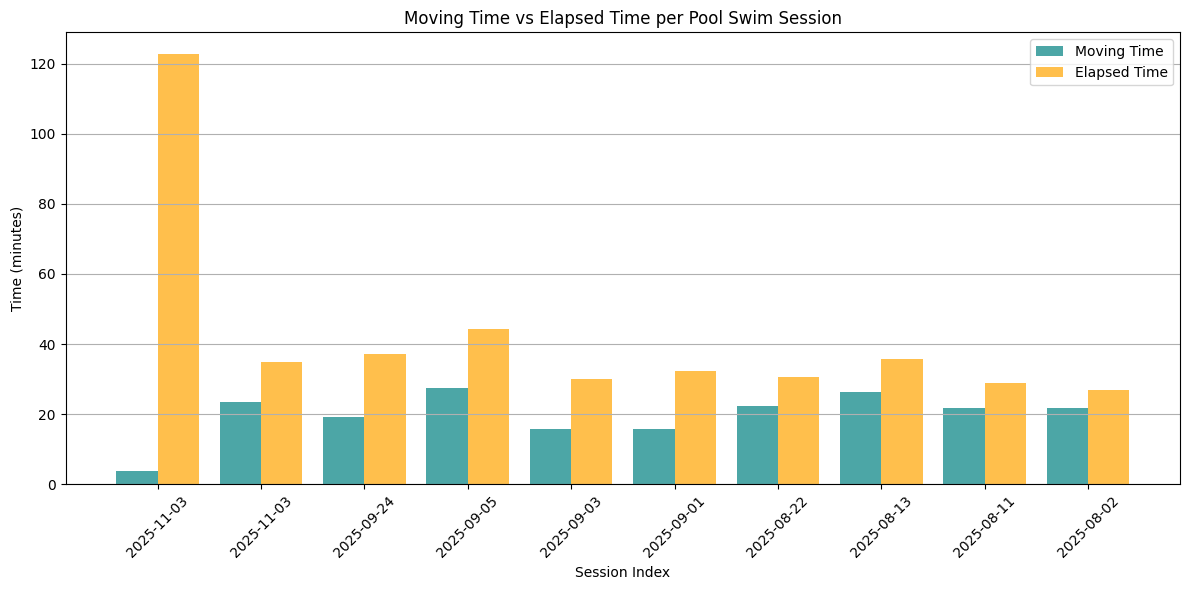

                  Date  Moving Time_min  Elapsed Time_min  Idle Time_min  \
0  2025-11-03 20:28:21         3.640000        122.816667     119.176667   
1  2025-11-03 18:26:07        23.483333         34.750000      11.266667   
13 2025-09-24 18:19:11        19.283333         37.166667      17.883333   
15 2025-09-05 17:48:02        27.383333         44.366667      16.983333   
21 2025-09-03 20:58:33        15.816667         30.066667      14.250000   

       Idle %  
0   97.036233  
1   32.422062  
13  48.116592  
15  38.279489  
21  47.394678  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter for Pool Swim ===
df_swim = df[df['Title'].str.strip() == 'Pool Swim'].copy()

# Convert Moving Time and Elapsed Time to minutes
def time_to_min(t):
    try:
        h, m, s = str(t).split(':')
        return int(h)*60 + int(m) + float(s)/60
    except:
        return np.nan

df_swim['Moving Time_min'] = df_swim['Moving Time'].apply(time_to_min)
df_swim['Elapsed Time_min'] = df_swim['Elapsed Time'].apply(time_to_min)

# Convert Date to datetime
df_swim['Date'] = pd.to_datetime(df_swim['Date'], errors='coerce')

# Drop rows with missing key metrics
df_swim = df_swim.dropna(subset=['Moving Time_min','Elapsed Time_min','Date'])

# === Bar chart: Moving vs Elapsed Time per session ===
plt.figure(figsize=(12,6))
width = 0.4
x = np.arange(len(df_swim))

plt.bar(x - width/2, df_swim['Moving Time_min'], width=width, label='Moving Time', color='teal', alpha=0.7)
plt.bar(x + width/2, df_swim['Elapsed Time_min'], width=width, label='Elapsed Time', color='orange', alpha=0.7)

plt.xlabel('Session Index')
plt.ylabel('Time (minutes)')
plt.title('Moving Time vs Elapsed Time per Pool Swim Session')
plt.legend()
plt.xticks(x, df_swim['Date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === Optional: Calculate idle proportion ===
df_swim['Idle Time_min'] = df_swim['Elapsed Time_min'] - df_swim['Moving Time_min']
df_swim['Idle %'] = df_swim['Idle Time_min'] / df_swim['Elapsed Time_min'] * 100
print(df_swim[['Date','Moving Time_min','Elapsed Time_min','Idle Time_min','Idle %']].head())


Number of Pool Swim rows: 10
Number of valid rows after cleaning: 10
                   Date  Moving Time_min  Elapsed Time_min     Idle %  \
0   2025-11-03 20:28:21         3.640000        122.816667  97.036233   
1   2025-11-03 18:26:07        23.483333         34.750000  32.422062   
13  2025-09-24 18:19:11        19.283333         37.166667  48.116592   
15  2025-09-05 17:48:02        27.383333         44.366667  38.279489   
21  2025-09-03 20:58:33        15.816667         30.066667  47.394678   

    Calories  Distance  Total Strokes  
0         37       175             52  
1        293      1200            548  
13       239      1000            443  
15       333      1350            608  
21       199       800            336  


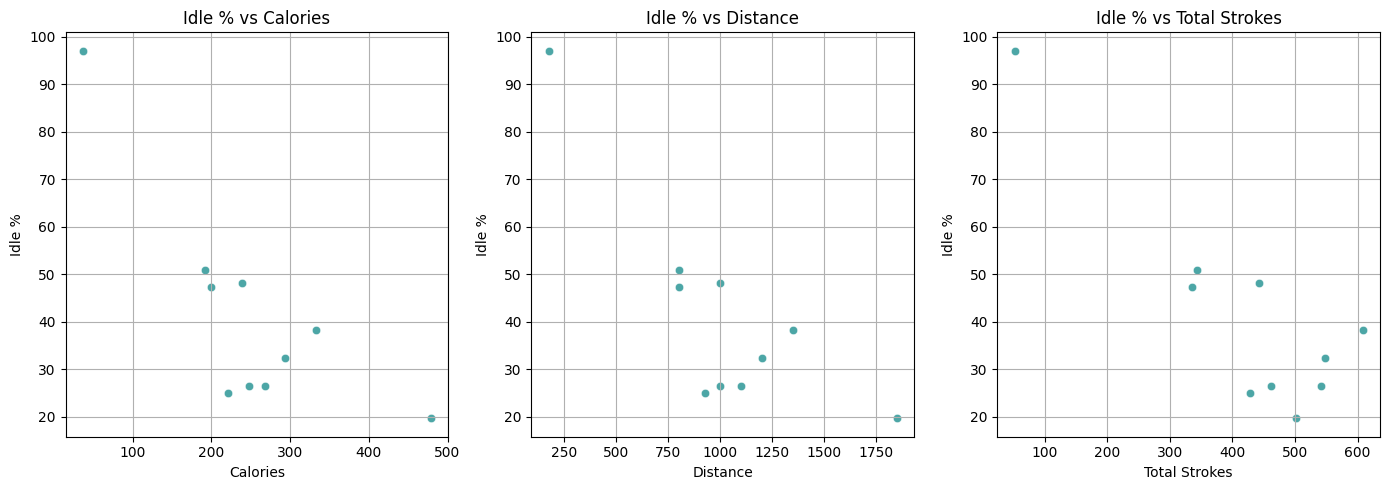

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter for Pool Swim ===
df_swim = df[df['Title'].str.strip() == 'Pool Swim'].copy()
print("Number of Pool Swim rows:", len(df_swim))

# === Convert Moving and Elapsed Time to minutes ===
def time_to_min(t):
    try:
        parts = str(t).split(':')
        if len(parts) == 3:
            h, m, s = parts
            return int(h)*60 + int(m) + float(s)/60
        elif len(parts) == 2:
            m, s = parts
            return int(m) + float(s)/60
        else:
            return np.nan
    except:
        return np.nan

df_swim['Moving Time_min'] = df_swim['Moving Time'].apply(time_to_min)
df_swim['Elapsed Time_min'] = df_swim['Elapsed Time'].apply(time_to_min)

# Drop rows with missing times
df_swim = df_swim.dropna(subset=['Moving Time_min','Elapsed Time_min'])

# === Calculate Idle Time and % Idle ===
df_swim['Idle Time_min'] = df_swim['Elapsed Time_min'] - df_swim['Moving Time_min']
df_swim['Idle %'] = df_swim['Idle Time_min'] / df_swim['Elapsed Time_min'] * 100

# === Optional: include Calories, Distance, Total Strokes as numeric for visualization ===
for col in ['Calories','Distance','Total Strokes']:
    df_swim[col] = pd.to_numeric(df_swim[col].astype(str).str.replace(',',''), errors='coerce')

# Drop rows with missing numeric metrics
df_swim = df_swim.dropna(subset=['Calories','Distance','Total Strokes'])

print("Number of valid rows after cleaning:", len(df_swim))
print(df_swim[['Date','Moving Time_min','Elapsed Time_min','Idle %','Calories','Distance','Total Strokes']].head())

# === Visualization: % Idle vs Calories, Distance, Total Strokes ===
variables = ['Calories','Distance','Total Strokes']

plt.figure(figsize=(14,5))
for i, var in enumerate(variables, 1):
    plt.subplot(1,3,i)
    sns.scatterplot(x=df_swim[var], y=df_swim['Idle %'], alpha=0.7, color='teal')
    plt.xlabel(var)
    plt.ylabel('Idle %')
    plt.title(f'Idle % vs {var}')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Show basic info
print("Columns in dataset:\n", df.columns)
print("\nDataset head:\n", df.head())
print("\nDataset dtypes:\n", df.dtypes)
print("\nNumber of rows:", len(df))

# === Filter for Pool Swim ===
df_swim = df[df['Title'].str.strip() == 'Pool Swim'].copy()
print("\nNumber of Pool Swim rows:", len(df_swim))

# Inspect raw values of key columns
key_cols = ['Moving Time', 'Elapsed Time', 'Calories', 'Distance', 'Avg Pace', 'Best Pace', 'Total Strokes']
print("\nSample values for key columns:")
print(df_swim[key_cols].head(10))

# Check for missing or invalid values
for col in key_cols:
    missing = df_swim[col].isna().sum()
    invalid = df_swim[col].astype(str).str.contains('--|nan|NaN|None').sum()
    print(f"{col}: {missing} missing, {invalid} invalid entries")

# Inspect unique values for problematic columns
for col in ['Moving Time', 'Elapsed Time']:
    print(f"\nUnique values in {col} (first 20):")
    print(df_swim[col].unique()[:20])

# Check numeric conversion
for col in ['Calories', 'Distance', 'Avg Pace', 'Best Pace', 'Total Strokes']:
    numeric = pd.to_numeric(df_swim[col].astype(str).str.replace(',','').replace('--',''), errors='coerce')
    print(f"{col}: {numeric.isna().sum()} rows could not be converted to numeric")


Columns in dataset:
 Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Swim Cadence', 'Max Swim Cadence',
       'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent',
       'Avg Stride Length', 'Training Stress Score®', 'Total Strokes',
       'Avg. Swolf', 'Avg Stroke Rate', 'Steps', 'Decompression',
       'Best Lap Time', 'Number of Laps', 'Moving Time', 'Elapsed Time',
       'Min Elevation', 'Max Elevation'],
      dtype='object')

Dataset head:
    Activity Type                 Date  Favorite                   Title  \
0      Pool Swim  2025-11-03 20:28:21     False               Pool Swim   
1      Pool Swim  2025-11-03 18:26:07     False               Pool Swim   
2  Indoor Rowing  2025-11-03 18:17:51     False           Indoor Rowing   
3        Walking  2025-11-03 14:00:23     False  City of Dundee Walking   
4        Walking  2025-11-02 19:56:26     False  City of Dundee Walking   

  Distance Calories  

Pool Swim rows: 10


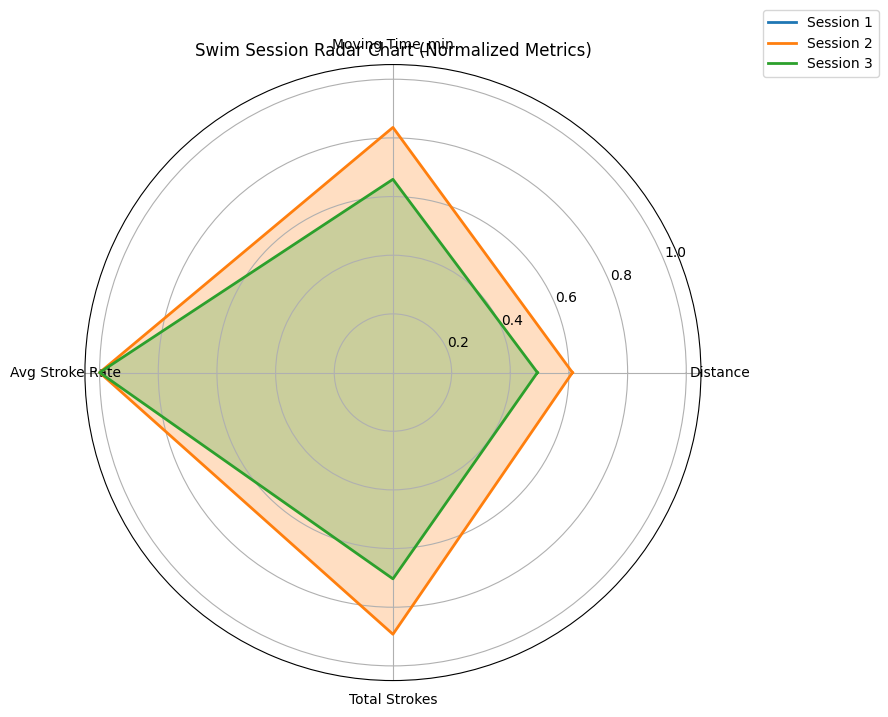

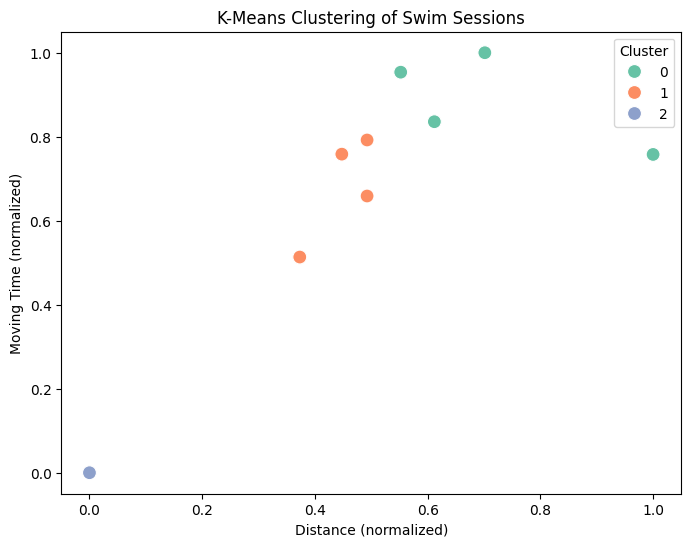

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter for Pool Swim ===
df_swim = df[df['Title'].str.strip() == 'Pool Swim'].copy()
print("Pool Swim rows:", len(df_swim))

# === Convert Moving Time to minutes ===
def time_to_min(t):
    try:
        parts = str(t).split(':')
        if len(parts) == 3:
            h, m, s = parts
            return int(h)*60 + int(m) + float(s)/60
        elif len(parts) == 2:
            m, s = parts
            return int(m) + float(s)/60
        else:
            return np.nan
    except:
        return np.nan

df_swim['Moving Time_min'] = df_swim['Moving Time'].apply(time_to_min)

# === Convert other metrics to numeric ===
for col in ['Distance','Avg Stroke Rate','Total Strokes']:
    df_swim[col] = pd.to_numeric(df_swim[col].astype(str).str.replace(',',''), errors='coerce')

# Drop rows with missing values
df_swim = df_swim.dropna(subset=['Distance','Moving Time_min','Avg Stroke Rate','Total Strokes'])

# === Prepare features for clustering ===
features = ['Distance','Moving Time_min','Avg Stroke Rate','Total Strokes']
X = df_swim[features]

# Normalize for radar chart
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=features)

# === Radar chart for first 3 sessions ===
categories = features
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

for i in range(min(3, len(df_scaled))):
    values = df_scaled.iloc[i].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Session {i+1}', linewidth=2)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title("Swim Session Radar Chart (Normalized Metrics)")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

# === K-Means clustering ===
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# === Scatter plot of clusters ===
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_scaled['Distance'],
    y=df_scaled['Moving Time_min'],
    hue=df_scaled['Cluster'],
    palette='Set2',
    s=100
)
plt.xlabel('Distance (normalized)')
plt.ylabel('Moving Time (normalized)')
plt.title('K-Means Clustering of Swim Sessions')
plt.legend(title='Cluster')
plt.show()


Pool Swim rows: 10
Cluster means (normalized):
          Distance  Moving Time_min  Avg Stroke Rate  Total Strokes
Cluster                                                           
0        0.716418         0.886810         0.916667       0.895234
1        0.435821         0.647199         0.822222       0.630216
2        0.000000         0.000000         0.000000       0.000000


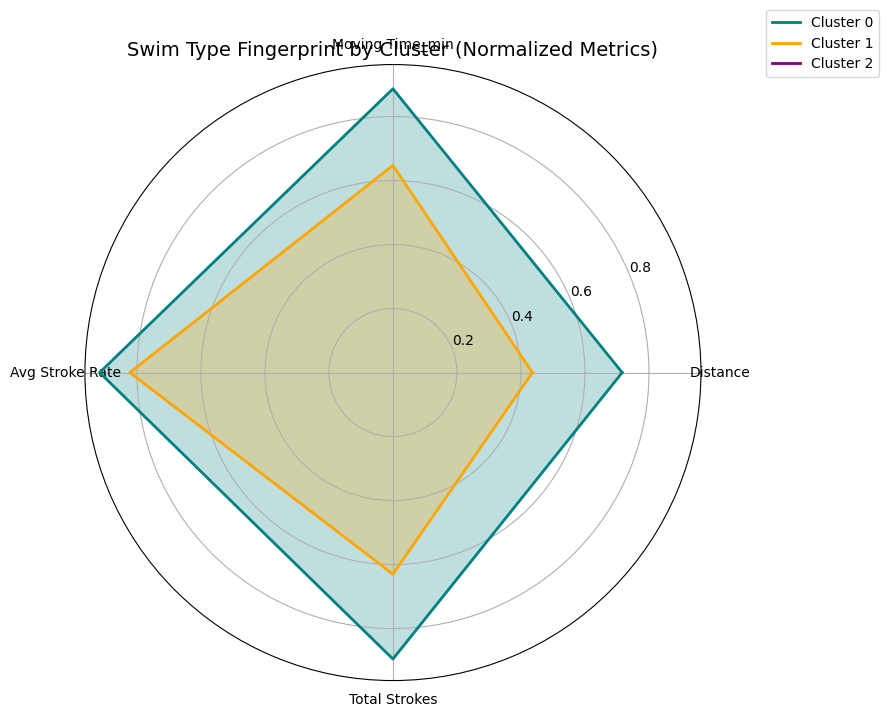

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter for Pool Swim ===
df_swim = df[df['Title'].str.strip() == 'Pool Swim'].copy()
print("Pool Swim rows:", len(df_swim))

# === Convert Moving Time to minutes ===
def time_to_min(t):
    try:
        parts = str(t).split(':')
        if len(parts) == 3:
            h, m, s = parts
            return int(h)*60 + int(m) + float(s)/60
        elif len(parts) == 2:
            m, s = parts
            return int(m) + float(s)/60
        else:
            return np.nan
    except:
        return np.nan

df_swim['Moving Time_min'] = df_swim['Moving Time'].apply(time_to_min)

# === Convert other metrics to numeric ===
for col in ['Distance','Avg Stroke Rate','Total Strokes']:
    df_swim[col] = pd.to_numeric(df_swim[col].astype(str).str.replace(',',''), errors='coerce')

# Drop rows with missing values
df_swim = df_swim.dropna(subset=['Distance','Moving Time_min','Avg Stroke Rate','Total Strokes'])

# === Prepare features for clustering ===
features = ['Distance','Moving Time_min','Avg Stroke Rate','Total Strokes']
X = df_swim[features]

# Normalize features for radar chart
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=features)

# === K-Means clustering ===
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# === Compute average metrics per cluster for radar chart ===
cluster_means = df_scaled.groupby('Cluster')[features].mean()
print("Cluster means (normalized):\n", cluster_means)

# === Radar chart per cluster ===
categories = features
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

colors = ['teal', 'orange', 'purple']

for i, cluster in enumerate(cluster_means.index):
    values = cluster_means.loc[cluster].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=f'Cluster {cluster}', color=colors[i], linewidth=2)
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title("Swim Type Fingerprint by Cluster (Normalized Metrics)", fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


Pool Swim rows: 10


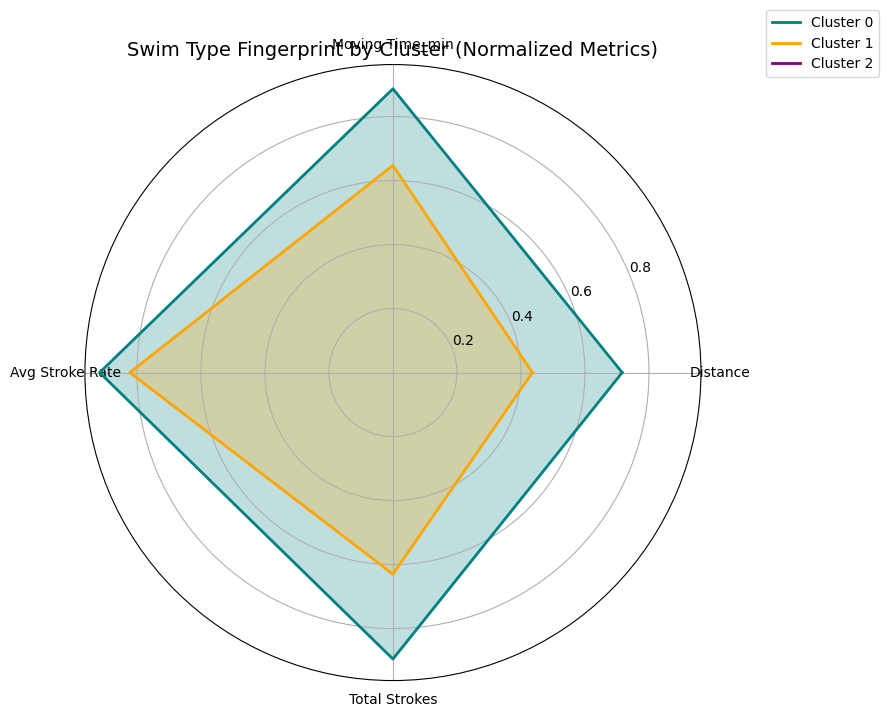

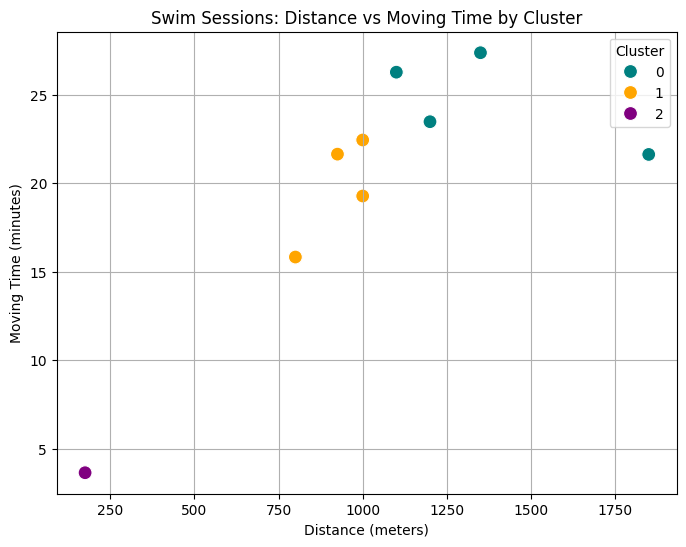

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# === Load dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Filter for Pool Swim ===
df_swim = df[df['Title'].str.strip() == 'Pool Swim'].copy()
print("Pool Swim rows:", len(df_swim))

# === Convert Moving Time to minutes ===
def time_to_min(t):
    try:
        parts = str(t).split(':')
        if len(parts) == 3:
            h, m, s = parts
            return int(h)*60 + int(m) + float(s)/60
        elif len(parts) == 2:
            m, s = parts
            return int(m) + float(s)/60
        else:
            return np.nan
    except:
        return np.nan

df_swim['Moving Time_min'] = df_swim['Moving Time'].apply(time_to_min)

# === Convert other metrics to numeric ===
for col in ['Distance','Avg Stroke Rate','Total Strokes']:
    df_swim[col] = pd.to_numeric(df_swim[col].astype(str).str.replace(',',''), errors='coerce')

# Drop rows with missing values
df_swim = df_swim.dropna(subset=['Distance','Moving Time_min','Avg Stroke Rate','Total Strokes'])

# === Prepare features for clustering ===
features = ['Distance','Moving Time_min','Avg Stroke Rate','Total Strokes']
X = df_swim[features]

# Normalize features for radar chart
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=features)

# === K-Means clustering ===
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Add cluster info back to original df_swim
df_swim['Cluster'] = df_scaled['Cluster'].values

# === Compute average metrics per cluster for radar chart ===
cluster_means = df_scaled.groupby('Cluster')[features].mean()

# === Radar chart per cluster ===
categories = features
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
colors = ['teal', 'orange', 'purple']

for i, cluster in enumerate(cluster_means.index):
    values = cluster_means.loc[cluster].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {cluster}', color=colors[i], linewidth=2)
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title("Swim Type Fingerprint by Cluster (Normalized Metrics)", fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

# === Scatter plot: Moving Time vs Distance colored by cluster ===
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_swim['Distance'],
    y=df_swim['Moving Time_min'],
    hue=df_swim['Cluster'],
    palette=colors,
    s=100
)
plt.xlabel("Distance (meters)")
plt.ylabel("Moving Time (minutes)")
plt.title("Swim Sessions: Distance vs Moving Time by Cluster")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


/tmp/ipython-input-385811056.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


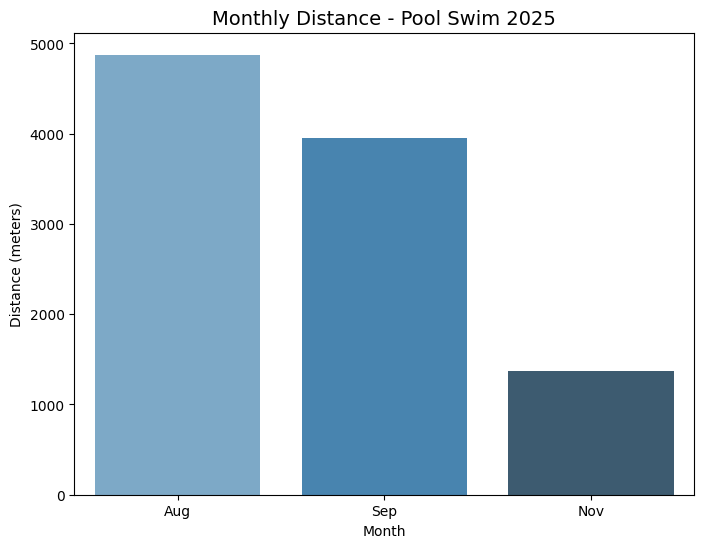

/tmp/ipython-input-385811056.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


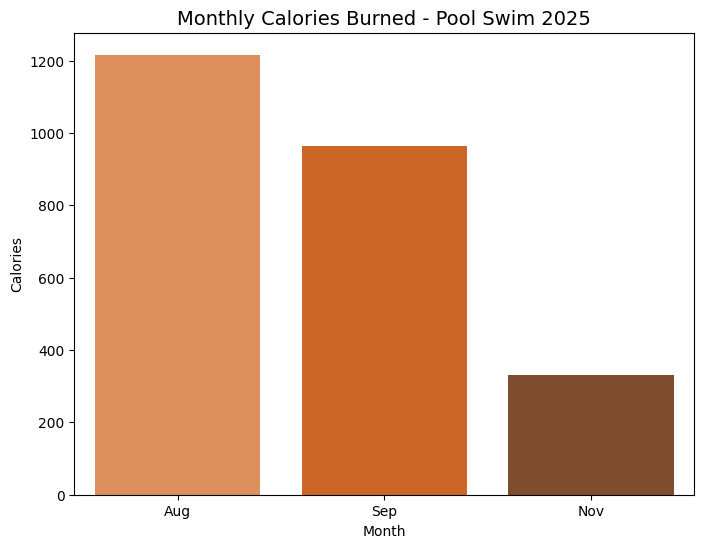

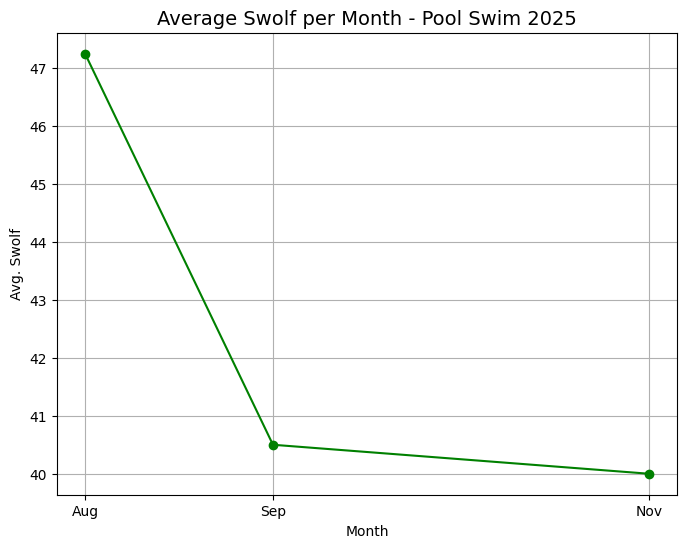

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample cleaned data
data = {
    'Date': ['2025-11-03 20:28:21','2025-11-03 18:26:07','2025-09-24 18:19:11','2025-09-05 17:48:02',
             '2025-09-03 20:58:33','2025-09-01 20:57:20','2025-08-22 20:48:59','2025-08-13 20:47:55',
             '2025-08-11 20:55:56','2025-08-02 17:29:03'],
    'Distance':[175,1200,1000,1350,800,800,1000,1100,925,1850],
    'Calories':[37,293,239,333,199,192,248,268,221,479],
    'Avg. Swolf':[39,41,40,42,40,40,45,48,47,49]
}

df_swim = pd.DataFrame(data)

# Convert Date to datetime
df_swim['Date'] = pd.to_datetime(df_swim['Date'])
df_swim['Year'] = df_swim['Date'].dt.year
df_swim['Month'] = df_swim['Date'].dt.month

# Aggregate monthly metrics
monthly_summary = df_swim.groupby(['Year','Month']).agg({
    'Distance':'sum',
    'Calories':'sum',
    'Avg. Swolf':'mean'
}).reset_index()

# === Bar Chart: Monthly Distance ===
plt.figure(figsize=(8,6))
sns.barplot(
    data=monthly_summary,
    x='Month',
    y='Distance',
    palette='Blues_d'
)
plt.title("Monthly Distance - Pool Swim 2025", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Distance (meters)")
plt.xticks(ticks=[0,1,2], labels=['Aug','Sep','Nov'])
plt.show()

# === Bar Chart: Monthly Calories ===
plt.figure(figsize=(8,6))
sns.barplot(
    data=monthly_summary,
    x='Month',
    y='Calories',
    palette='Oranges_d'
)
plt.title("Monthly Calories Burned - Pool Swim 2025", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Calories")
plt.xticks(ticks=[0,1,2], labels=['Aug','Sep','Nov'])
plt.show()

# === Line Chart: Avg. Swolf per Month ===
plt.figure(figsize=(8,6))
plt.plot(monthly_summary['Month'], monthly_summary['Avg. Swolf'], marker='o', color='green')
plt.title("Average Swolf per Month - Pool Swim 2025", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Avg. Swolf")
plt.xticks(ticks=[8,9,11], labels=['Aug','Sep','Nov'])
plt.grid(True)
plt.show()


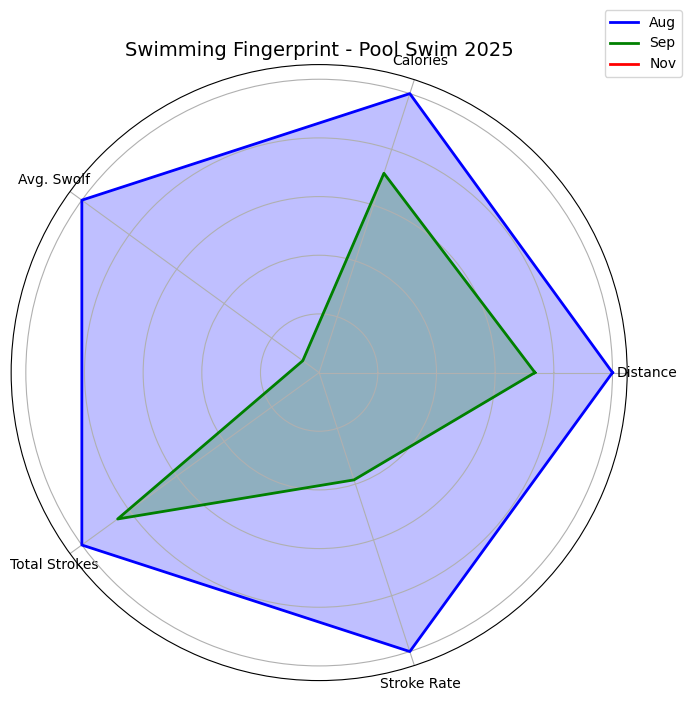

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample cleaned data for Pool Swim
data = {
    'Date': ['2025-11-03 20:28:21','2025-11-03 18:26:07','2025-09-24 18:19:11','2025-09-05 17:48:02',
             '2025-09-03 20:58:33','2025-09-01 20:57:20','2025-08-22 20:48:59','2025-08-13 20:47:55',
             '2025-08-11 20:55:56','2025-08-02 17:29:03'],
    'Distance':[175,1200,1000,1350,800,800,1000,1100,925,1850],
    'Calories':[37,293,239,333,199,192,248,268,221,479],
    'Avg. Swolf':[39,41,40,42,40,40,45,48,47,49],
    'Total Strokes':[52,548,443,608,336,344,461,542,428,501],
    'Stroke Rate':[14,23,20,22,18,19,21,24,20,22]
}

df_swim = pd.DataFrame(data)
df_swim['Date'] = pd.to_datetime(df_swim['Date'])
df_swim['Month'] = df_swim['Date'].dt.month

# Aggregate metrics per month
monthly_metrics = df_swim.groupby('Month').agg({
    'Distance':'sum',
    'Calories':'sum',
    'Avg. Swolf':'mean',
    'Total Strokes':'sum',
    'Stroke Rate':'mean'
}).reset_index()

# Normalize metrics to 0-1 scale
metrics = ['Distance','Calories','Avg. Swolf','Total Strokes','Stroke Rate']
monthly_norm = monthly_metrics.copy()
for col in metrics:
    min_val = monthly_metrics[col].min()
    max_val = monthly_metrics[col].max()
    monthly_norm[col] = (monthly_metrics[col]-min_val)/(max_val-min_val)

# Radar chart setup
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

# Plot each month
colors = ['b','g','r']  # colors for months
month_labels = {8:'Aug',9:'Sep',11:'Nov'}

for i, row in monthly_norm.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, color=colors[i], linewidth=2, label=month_labels[row['Month']])
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])  # optional: hide radial ticks
ax.set_title("Swimming Fingerprint - Pool Swim 2025", fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


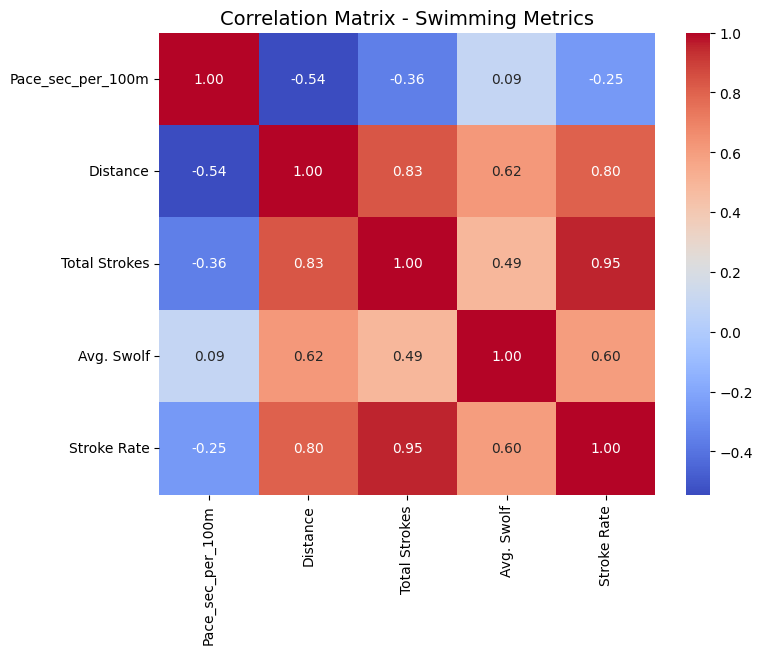

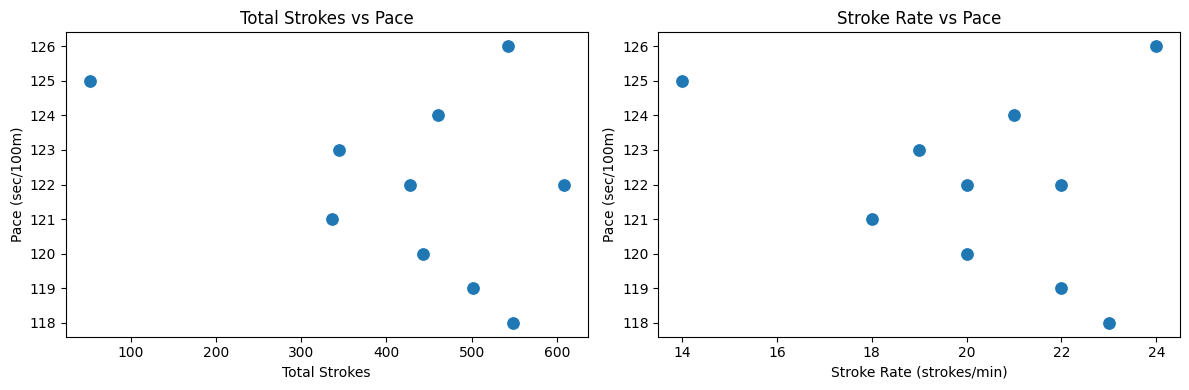

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Pool Swim data
data = {
    'Date': ['2025-11-03 20:28:21','2025-11-03 18:26:07','2025-09-24 18:19:11','2025-09-05 17:48:02',
             '2025-09-03 20:58:33','2025-09-01 20:57:20','2025-08-22 20:48:59','2025-08-13 20:47:55',
             '2025-08-11 20:55:56','2025-08-02 17:29:03'],
    'Distance':[175,1200,1000,1350,800,800,1000,1100,925,1850],
    'Total Strokes':[52,548,443,608,336,344,461,542,428,501],
    'Avg. Swolf':[39,41,40,42,40,40,45,48,47,49],
    'Stroke Rate':[14,23,20,22,18,19,21,24,20,22],
    # Simulated Pace in seconds per 100m (lower = faster)
    'Pace_sec_per_100m':[125,118,120,122,121,123,124,126,122,119]
}

df_swim = pd.DataFrame(data)

# --- Correlation matrix ---
corr_metrics = ['Pace_sec_per_100m','Distance','Total Strokes','Avg. Swolf','Stroke Rate']
corr_matrix = df_swim[corr_metrics].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Swimming Metrics", fontsize=14)
plt.show()

# --- Scatter plots ---
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(data=df_swim, x='Total Strokes', y='Pace_sec_per_100m', s=100)
plt.xlabel("Total Strokes")
plt.ylabel("Pace (sec/100m)")
plt.title("Total Strokes vs Pace")

plt.subplot(1,2,2)
sns.scatterplot(data=df_swim, x='Stroke Rate', y='Pace_sec_per_100m', s=100)
plt.xlabel("Stroke Rate (strokes/min)")
plt.ylabel("Pace (sec/100m)")
plt.title("Stroke Rate vs Pace")

plt.tight_layout()
plt.show()
